# Projeto de Séries Temporais
## Chuvas no município de São Paulo
### João Honorato, Maria Raquel

Estamos usando dados mensais de precipitação de chuva no município de São Paulo, extraídos do Departamento de Águas e Energia Elétrica (DAEE), do período de 1985 a 2022 

link: http://www.hidrologia.daee.sp.gov.br/

A chuva é medida em milímetros, 1 mm de altura de chuva equivale ao volume de 1 litro precipitado sobre uma superfície de 1 m² de área.

As alturas mensais de chuva são as acumuladas entre 7 horas do último dia do mês anterior até às 7 horas do último dia do mês considerado.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

### Carregando e tratando os dados

In [3]:
# Carregando os dados

chuvasp = pd.read_csv('E3-262_Chuva_Mensal_Serie_20230830_084446.csv', sep=';')
chuvasp.head()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,1985,"184,90","242,90","230,00","59,00","126,20","14,60","4,00","21,80","126,10","71,10","111,30","155,20"
1,1986,"199,60","221,00","218,70","106,50","113,10","3,90","30,30",---,"34,50","60,70","242,50","389,90"
2,1987,"525,80",---,"161,30","98,10","293,80","183,90","11,80","30,90","80,20","84,80","72,70","152,10"
3,1988,"268,70","224,40","189,20","175,10","224,90","58,60","1,30","0,20","28,40","173,90","100,20","289,80"
4,1989,"312,90","344,30","288,20","66,30","21,70","52,50","150,10","32,90","52,10","80,10","88,00","236,70"


In [4]:
# Precisamos substituir as vírgulas por pontos para converter os valores para float

chuvasp = chuvasp.replace(',','.', regex=True)
chuvasp.head()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,1985,184.90,242.90,230.00,59.00,126.20,14.60,4.00,21.80,126.10,71.10,111.30,155.20
1,1986,199.60,221.00,218.70,106.50,113.10,3.90,30.30,---,34.50,60.70,242.50,389.90
2,1987,525.80,---,161.30,98.10,293.80,183.90,11.80,30.90,80.20,84.80,72.70,152.10
3,1988,268.70,224.40,189.20,175.10,224.90,58.60,1.30,0.20,28.40,173.90,100.20,289.80
4,1989,312.90,344.30,288.20,66.30,21.70,52.50,150.10,32.90,52.10,80.10,88.00,236.70


In [5]:
# De acordo com o DAEE, valores com '---' representam dados inexistentes.
# Vamos substituí-los pela de chuvas de cada mês, dado presente na última linha do dataset

chuvasp.tail()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
34,2019,---,315.50,318.50,172.30,97.30,59.00,195.10,6.70,73.70,75.90,170.80,249.00
35,2020,408.10,363.00,95.50,5.60,13.70,163.80,10.20,62.10,22.90,213.90,162.10,---
36,2021,373.30,174.10,137.80,55.70,38.50,15.50,38.00,44.80,---,152.80,108.20,247.40
37,2022,418.40,136.30,233.60,40.40,67.30,45.90,8.80,35.20,131.30,117.30,197.70,200.40
38,Média:,309.01,249.32,228.13,92.24,84.89,58.09,51.79,28.56,85.08,139.63,145.48,235.36


In [6]:
for coluna, i in zip(chuvasp.columns, range(14)):
    chuvasp[coluna] = chuvasp[coluna].str.replace('---', f'{chuvasp.iloc[-1][i]}')

chuvasp.tail()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
34,2019,309.01,315.50,318.50,172.30,97.30,59.00,195.10,6.70,73.70,75.90,170.80,249.00
35,2020,408.10,363.00,95.50,5.60,13.70,163.80,10.20,62.10,22.90,213.90,162.10,235.36
36,2021,373.30,174.10,137.80,55.70,38.50,15.50,38.00,44.80,85.08,152.80,108.20,247.40
37,2022,418.40,136.30,233.60,40.40,67.30,45.90,8.80,35.20,131.30,117.30,197.70,200.40
38,Média:,309.01,249.32,228.13,92.24,84.89,58.09,51.79,28.56,85.08,139.63,145.48,235.36


In [7]:
valores_medios = chuvasp.iloc[-1][1:].values.astype(float)
valores_medios

array([309.01, 249.32, 228.13,  92.24,  84.89,  58.09,  51.79,  28.56,
        85.08, 139.63, 145.48, 235.36])

In [8]:
# Excluiremos a última linha
chuvasp = chuvasp.drop(chuvasp[chuvasp['Ano'] == '  Média:'].index)

chuvasp.tail()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
33,2018,238.20,84.50,228.13,66.40,25.80,15.00,20.50,28.56,72.90,203.40,134.10,258.00
34,2019,309.01,315.50,318.50,172.30,97.30,59.00,195.10,6.70,73.70,75.90,170.80,249.00
35,2020,408.10,363.00,95.50,5.60,13.70,163.80,10.20,62.10,22.90,213.90,162.10,235.36
36,2021,373.30,174.10,137.80,55.70,38.50,15.50,38.00,44.80,85.08,152.80,108.20,247.40
37,2022,418.40,136.30,233.60,40.40,67.30,45.90,8.80,35.20,131.30,117.30,197.70,200.40


In [9]:
# Excluiremos a coluna ano
chuvasp = chuvasp.drop(columns=['Ano'])
chuvasp.tail()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
33,238.20,84.50,228.13,66.40,25.80,15.00,20.50,28.56,72.90,203.40,134.10,258.00
34,309.01,315.50,318.50,172.30,97.30,59.00,195.10,6.70,73.70,75.90,170.80,249.00
35,408.10,363.00,95.50,5.60,13.70,163.80,10.20,62.10,22.90,213.90,162.10,235.36
36,373.30,174.10,137.80,55.70,38.50,15.50,38.00,44.80,85.08,152.80,108.20,247.40
37,418.40,136.30,233.60,40.40,67.30,45.90,8.80,35.20,131.30,117.30,197.70,200.40


In [10]:
# Convertendo os valores para float

chuvasp = chuvasp.astype(float)

In [11]:
## salvar a última linha (dados de 2022) em um array

valores_2022 = chuvasp.iloc[-1][:].values.astype(float)
valores_2022

array([418.4, 136.3, 233.6,  40.4,  67.3,  45.9,   8.8,  35.2, 131.3,
       117.3, 197.7, 200.4])

In [12]:
## excluir a última linha de chuvasp

chuvasp.drop(chuvasp.tail(1).index,inplace=True)
chuvasp.tail()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
32,309.01,249.32,120.80,156.3,166.1,101.6,0.2,53.40,12.00,121.2,174.4,169.60
33,238.20,84.50,228.13,66.4,25.8,15.0,20.5,28.56,72.90,203.4,134.1,258.00
34,309.01,315.50,318.50,172.3,97.3,59.0,195.1,6.70,73.70,75.9,170.8,249.00
35,408.10,363.00,95.50,5.6,13.7,163.8,10.2,62.10,22.90,213.9,162.1,235.36
36,373.30,174.10,137.80,55.7,38.5,15.5,38.0,44.80,85.08,152.8,108.2,247.40


In [13]:
valores = list(chuvasp.values.flatten())
print(valores)

[184.9, 242.9, 230.0, 59.0, 126.2, 14.6, 4.0, 21.8, 126.1, 71.1, 111.3, 155.2, 199.6, 221.0, 218.7, 106.5, 113.1, 3.9, 30.3, 28.56, 34.5, 60.7, 242.5, 389.9, 525.8, 249.32, 161.3, 98.1, 293.8, 183.9, 11.8, 30.9, 80.2, 84.8, 72.7, 152.1, 268.7, 224.4, 189.2, 175.1, 224.9, 58.6, 1.3, 0.2, 28.4, 173.9, 100.2, 289.8, 312.9, 344.3, 288.2, 66.3, 21.7, 52.5, 150.1, 32.9, 52.1, 80.1, 88.0, 236.7, 284.1, 196.9, 310.1, 85.8, 77.9, 50.6, 121.2, 76.3, 97.2, 206.8, 116.3, 149.8, 330.7, 340.3, 522.4, 200.3, 43.3, 96.8, 28.2, 37.3, 101.4, 168.0, 67.3, 237.9, 129.2, 258.5, 228.13, 87.2, 93.5, 11.6, 40.9, 24.7, 150.6, 219.6, 145.48, 211.7, 221.5, 225.7, 110.0, 84.6, 133.9, 74.7, 11.2, 40.8, 210.1, 134.1, 125.5, 170.5, 196.9, 184.4, 231.6, 111.4, 54.9, 30.5, 39.2, 2.4, 1.8, 147.6, 86.6, 276.3, 373.8, 383.1, 267.7, 73.9, 79.7, 31.2, 46.8, 1.5, 44.2, 202.6, 115.1, 235.36, 334.3, 376.5, 284.5, 42.3, 21.7, 45.1, 12.2, 41.2, 179.4, 179.8, 87.4, 243.9, 235.0, 187.6, 57.1, 63.2, 88.2, 124.7, 12.5, 28.8, 118.0,

In [14]:
anos = pd.date_range('1985', periods = len(valores), freq = 'M')
anos

DatetimeIndex(['1985-01-31', '1985-02-28', '1985-03-31', '1985-04-30',
               '1985-05-31', '1985-06-30', '1985-07-31', '1985-08-31',
               '1985-09-30', '1985-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=444, freq='M')

In [15]:
serie = pd.Series(valores, index = anos)
serie

1985-01-31    184.90
1985-02-28    242.90
1985-03-31    230.00
1985-04-30     59.00
1985-05-31    126.20
               ...  
2021-08-31     44.80
2021-09-30     85.08
2021-10-31    152.80
2021-11-30    108.20
2021-12-31    247.40
Freq: M, Length: 444, dtype: float64

In [16]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov','Dez']
serie_medias = pd.Series(valores_medios, index = meses)

### Gráficos da série temporal

In [17]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=serie.index, y=serie.values,
                    mode='lines',
                    name='lines'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

In [22]:
plt.rcParams['figure.figsize'] = (20, 10)

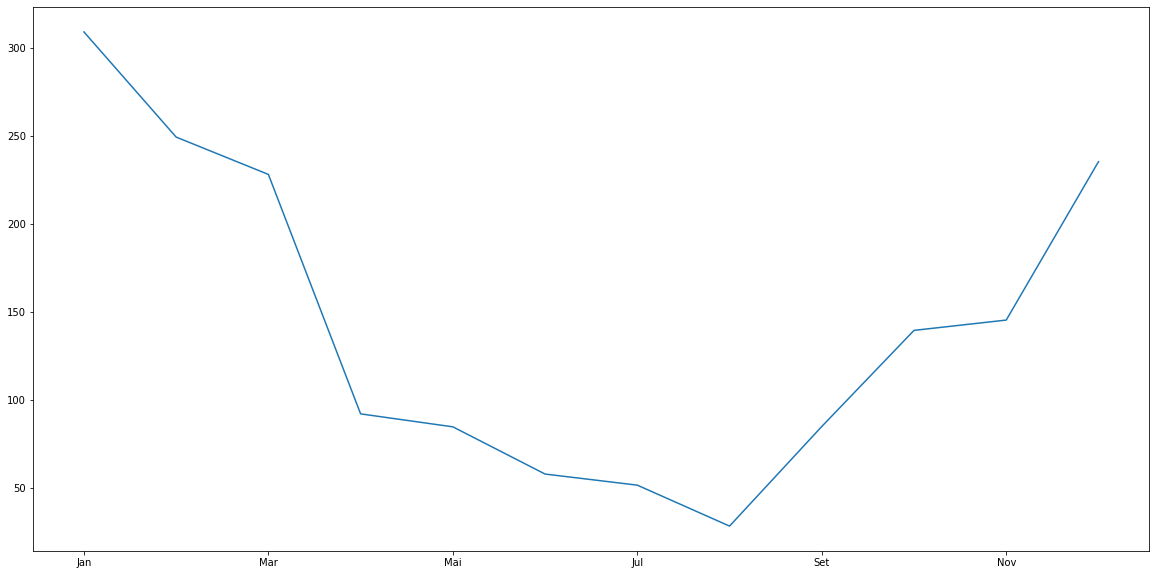

In [23]:
serie_medias.plot();

### Média móvel

A média móvel é utilizada para suavizar grandes desvios e auxiliar a identificação de tendências nos dados. Usaremos a média móvel dos últimos seis meses no presente trabalho.

In [19]:
media_movel = serie.rolling(window = 6)
media_movel = media_movel.mean()

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=media_movel.index, y=media_movel.values,
                    mode='lines',
                    name='lines'))
fig.update_layout(title='Média móvel de 6 meses das chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=serie.index, y=serie.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=media_movel.index, y=media_movel.values,
                    mode='lines',
                    name='Média móvel'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

### Decomposição

Vamos decompor a série em tendência, sazonalidade e resíduos:

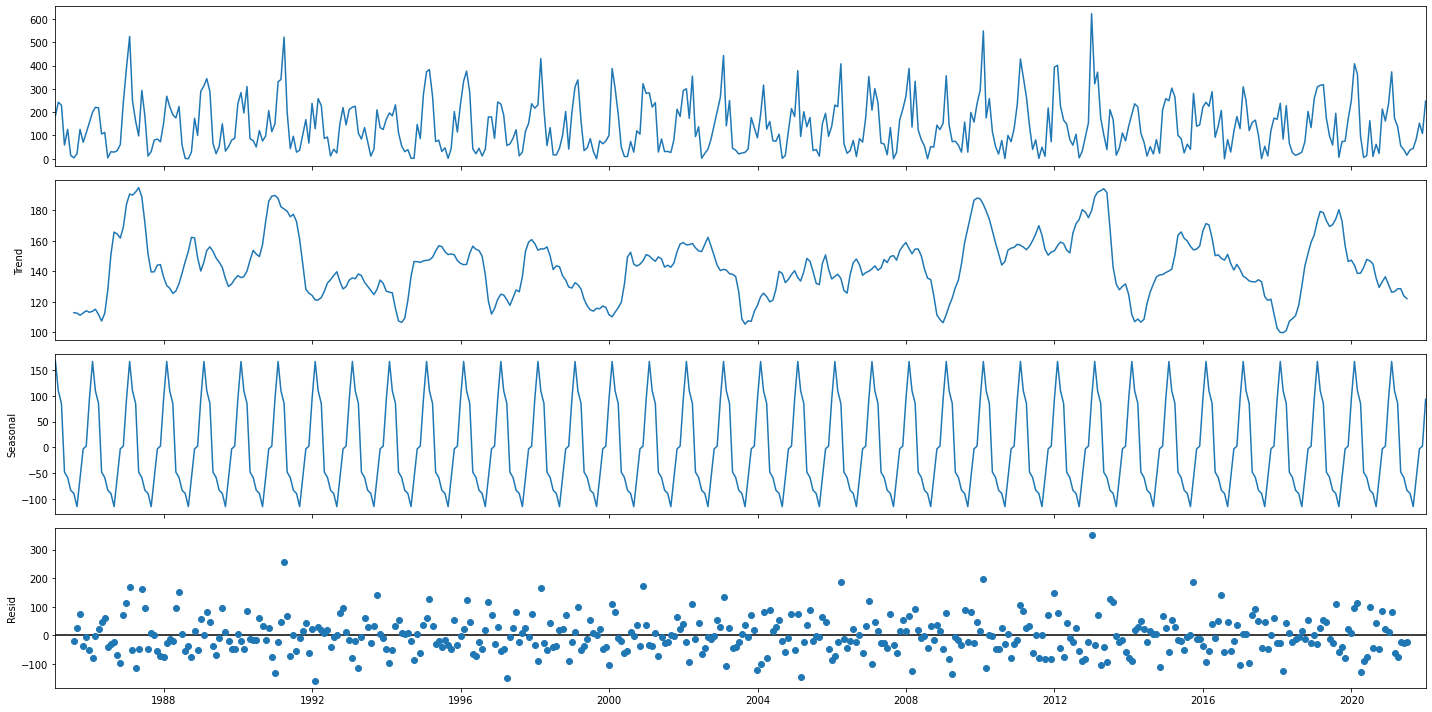

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao = seasonal_decompose(serie)
decomposicao.plot();

Observações:

- Tendência apresenta muitas oscilações, não demonstrando comportamento crescente ou decrescente
- Além disso, a tendência não possui ciclos bem definidos, dado o seu comportamento oscilatório
- Forte sazonalidade, com picos constantes e intervalos bem definidos (aproximadamente um ano)
- Resíduos serão utilizados para construção e validação dos modelos

### Normalidade

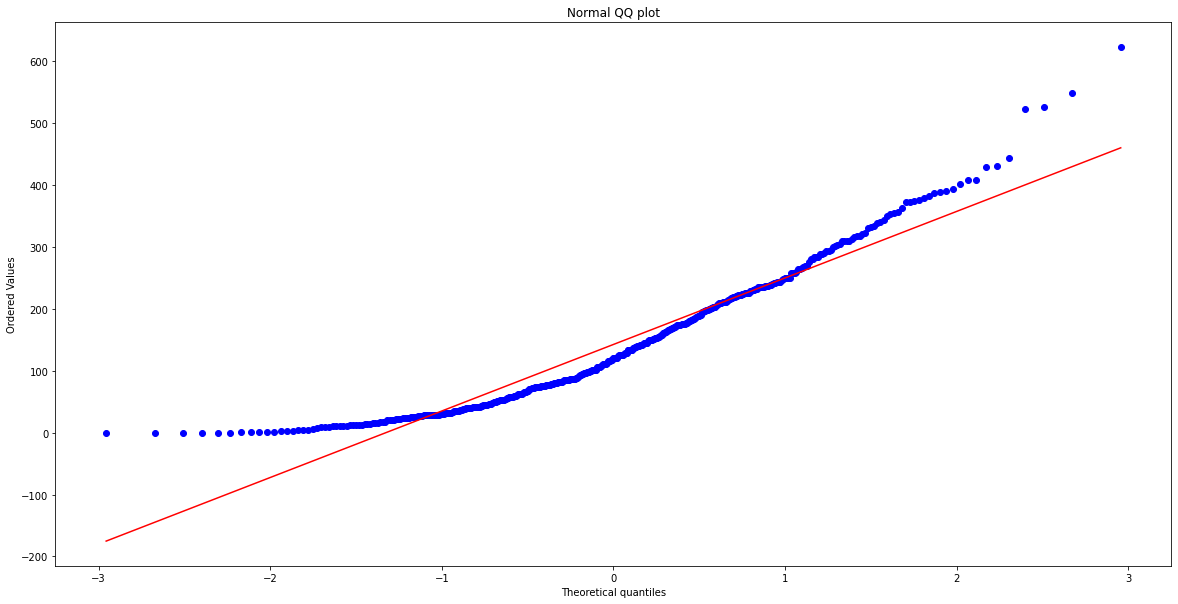

In [26]:
import scipy.stats as stats
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Graficamente, notamos que os dados não seguem uma distribuição normal. Mesmo assim, faremos um teste de hipóteses para verificação da normalidade da série. Usaremos o teste de Shapiro-Wilk, ideal para o tamanho da amostra, com nível de significância de 5%.

**Teste Shapiro-Wilk**


- H0 = distribuição normal p > 0,05
- H1 = distribuição não normal p <= 0,05

In [27]:
e, p = stats.shapiro(serie)
print(f'Estátistica de teste: {e:.4f}')
print(f'p-valor: {p:.4e}')

Estátistica de teste: 0.9248
p-valor: 4.0446e-14


De fato, os dados não seguem uma distribuição normal.

Para fazer com que a série se aproxime de uma distribuição normal, faremos uma transformação por raiz cúbica. Assim, criaremos uma nova série, composta pela raiz cúbica dos dados originais.

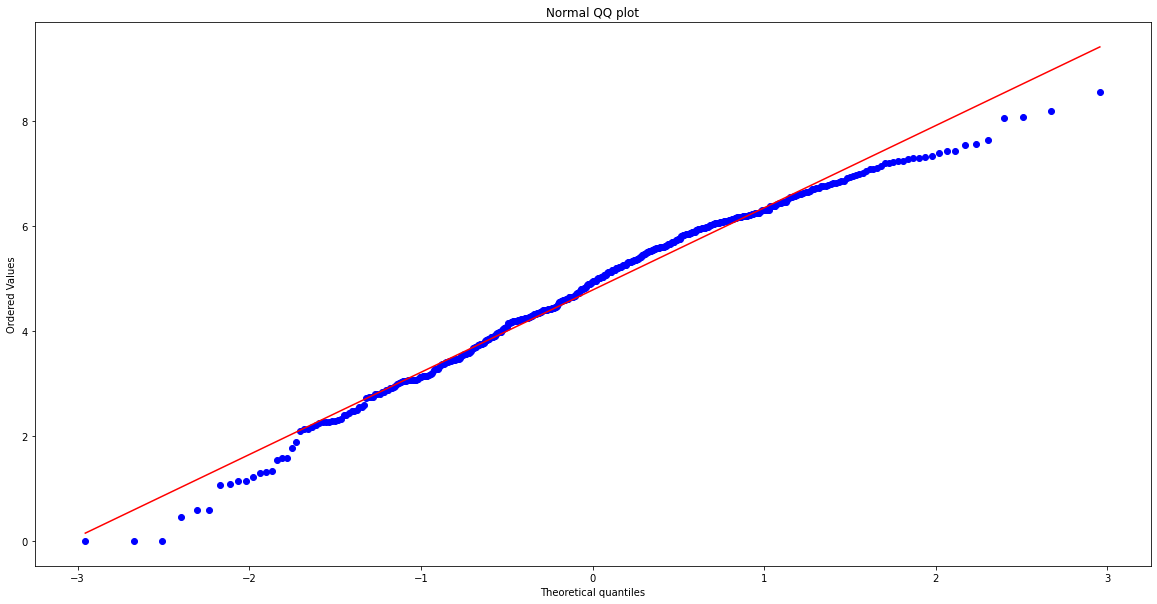

In [28]:
serie_n = (serie)**(1/3)
stats.probplot(serie_n, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Após a transformação, os dados já estão mais próximos de uma distribuição normal. Para comprovar isso, repetiremos o teste de Shapiro-Wilk.

In [29]:
e, p = stats.shapiro(serie_n)
print(f'Estátistica de teste: {e:.4f}')
print(f'p-valor: {p:.4e}')

Estátistica de teste: 0.9837
p-valor: 6.9979e-05


Ainda não obtivemos uma distribuição normal, mas estamos mais próximos do que a série original.

C:\Users\jahon\AppData\Local\Temp\ipykernel_10588\103337203.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




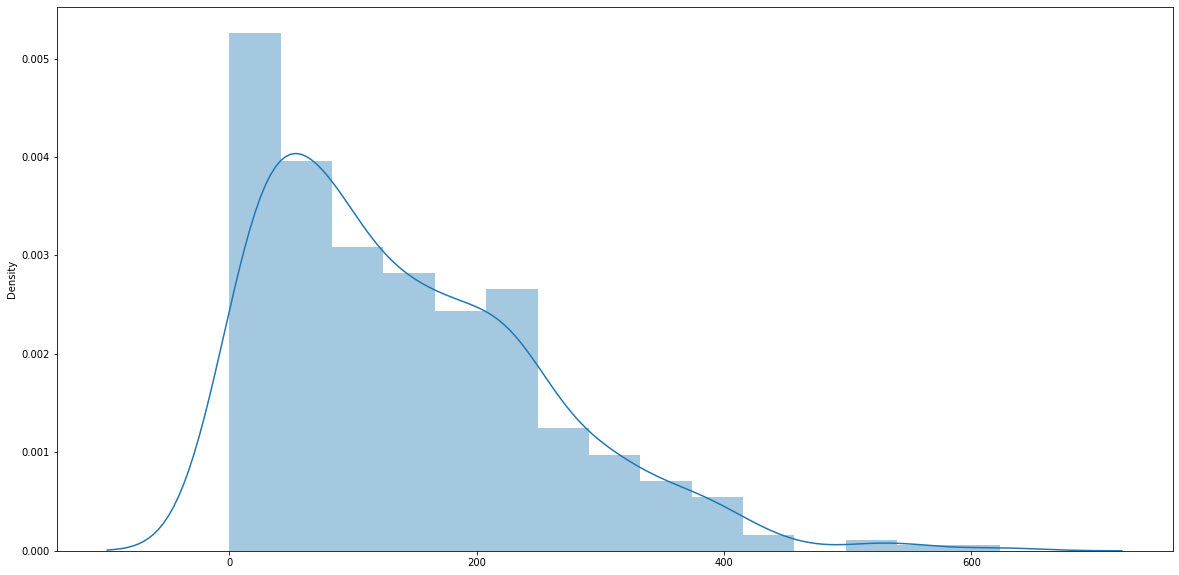

In [30]:
import seaborn as sns

sns.distplot(serie);

C:\Users\jahon\AppData\Local\Temp\ipykernel_10588\4180245685.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




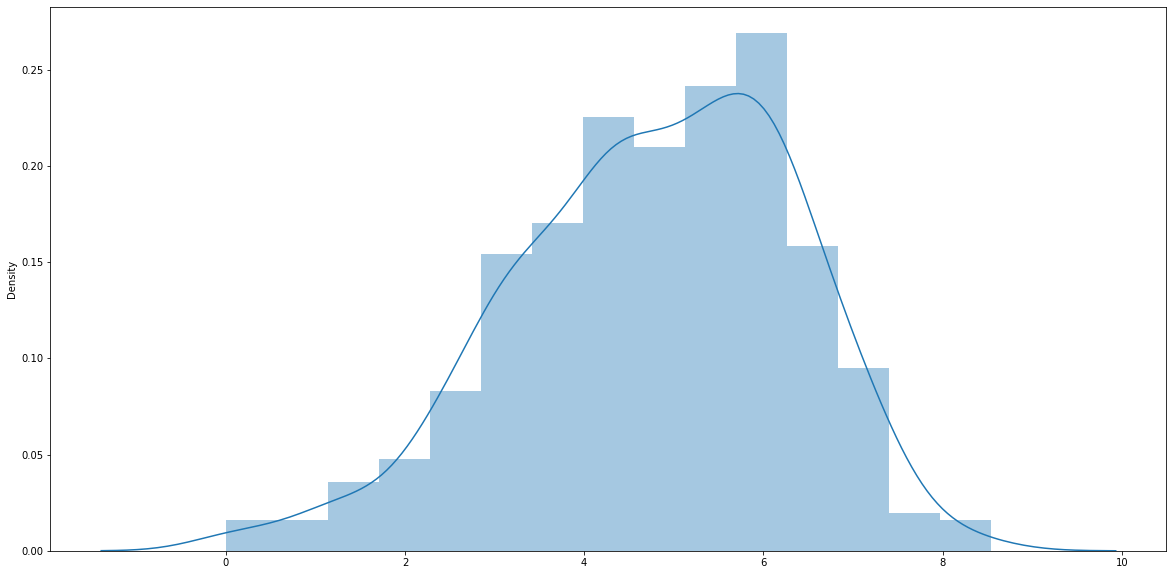

In [31]:
sns.distplot(serie_n);

### Estacionariedade

Estacionariedade é a característica de séries que se desenvolvem no tempo através de uma média/variância constante.

Séries não estacionárias costumam seguir uma tendência e mudam de comportamento por inclinação ou mudança de nível no gráfico.

Para determinar a estacionariedade de uma série, utilizamos testes estatísticos. Para a nossa série, usaremos o teste KPSS.

**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

- H0 = não é estacionário: estatística do teste > valor crítico
- H1 = é estacionário:  estatística do teste < valor crítico

Para escolha do valor crítico, utilizaremos o valor de referência para 5%

In [32]:
import statsmodels.tsa.stattools

kpss = statsmodels.tsa.stattools.kpss(serie_n)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
    print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0172
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\jahon\AppData\Local\Temp\ipykernel_10588\2338894414.py:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Como a estatística de teste deu um valor inferior ao valor crítico para 5%, temos que a série **É ESTACIONÁRIA**

Dessa forma, não será necessário fazer a diferenciação.

### Autocorrelação

A autocorrelação ocorre quando há **correlação entre determinados períodos anteriores com o período atual.**

Períodos com autocorrelação são chamados de lags.

A análise de autocorrelação dos resíduos é um **pressuposto para construção e validação de modelos preditivos.**


Para verificar a autocorrelação, utilizaremos os **diagramas ACF e PACF.**


Veremos nos diagramas abaixo que série **é autocorrelacionada**, com valores acima do intervalo de confiança.

Isso não será um problema, pois esse é um pressuposto da análise dos resíduos dos modelos de séries temporais.

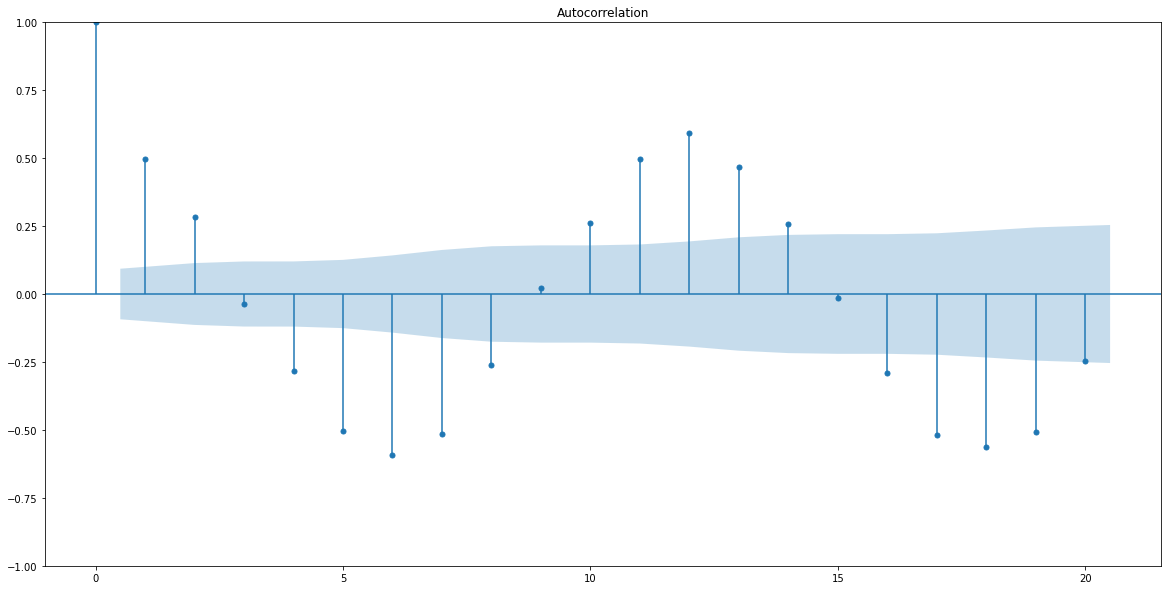

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(serie_n, lags=20)
plt.show()

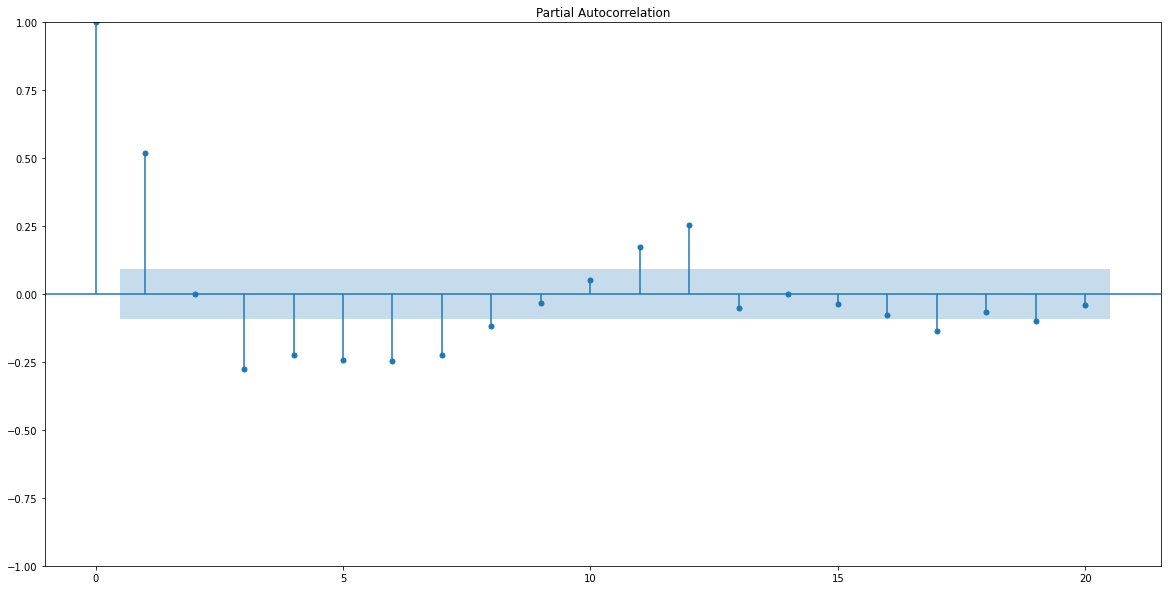

In [34]:
plot_pacf(serie, lags=20)
plt.show()

## **Modelo AR**

Modelos ARIMA não sazonais são geralmente denotados como ARIMA(p, d, q), em que o parâmetro p é a ordem do modelo auto-regressivo, d é o grau de diferenciação e q é a ordem do modelo de média móvel.


O modelo AR (Auto-Regressivo) indica que a variável evoluinte de interesse é regressada em seus próprios valores anteriores.

Ele é um modelo ARIMA nos quais os parâmetros d e q são nulos e o parâmetro p não.

AIC (Critério de Informação de Akaike) e BIC (Critério de Informação Bayesiano) são métricas que mensuram a qualidade de um modelo estatístico. Quanto menor for o AIC e BIC, melhor é o modelo.



In [35]:
from statsmodels.tsa.arima.model import ARIMA

for p in range(1, 11):
    modelo_ar = ARIMA(serie_n, order = (p,0,0))
    teste = modelo_ar.fit()
    print(f'ARIMA({p},0,0) - AIC: {teste.aic:.4f}')

ARIMA(1,0,0) - AIC: 1538.7750
ARIMA(2,0,0) - AIC: 1539.7467
ARIMA(3,0,0) - AIC: 1510.2645
ARIMA(4,0,0) - AIC: 1479.9950
ARIMA(5,0,0) - AIC: 1433.6326
ARIMA(6,0,0) - AIC: 1389.7625
ARIMA(7,0,0) - AIC: 1366.9554
ARIMA(8,0,0) - AIC: 1367.5184
ARIMA(9,0,0) - AIC: 1369.4362
ARIMA(10,0,0) - AIC: 1371.4325


In [36]:
modelo_ar = ARIMA(serie_n, order = (7,0,0))
resultado = modelo_ar.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -674.478
Date:                Tue, 19 Sep 2023   AIC                           1366.955
Time:                        22:31:11   BIC                           1403.818
Sample:                    01-31-1985   HQIC                          1381.492
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7764      0.036    131.829      0.000       4.705       4.847
ar.L1          0.1558      0.044      3.524      0.000       0.069       0.243
ar.L2          0.0835      0.050      1.664      0.0

### Análise dos Resíduos

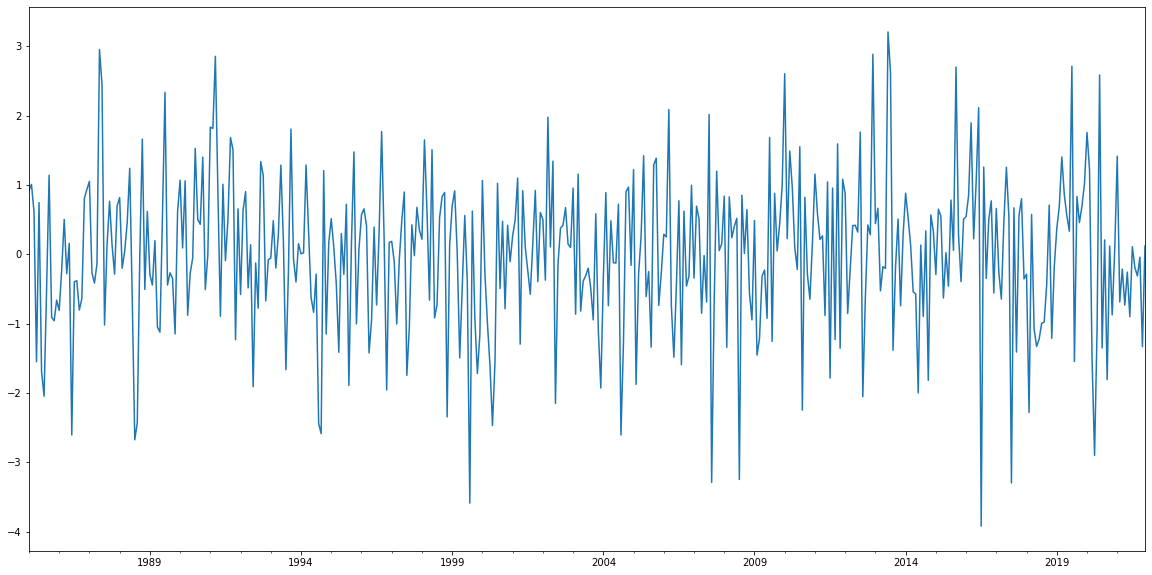

In [37]:
residuos = resultado.resid
residuos.plot();

Média em torno do zero, com pouca tendência.

Resíduos bem concentrados, estáveis.

#### Normalidade

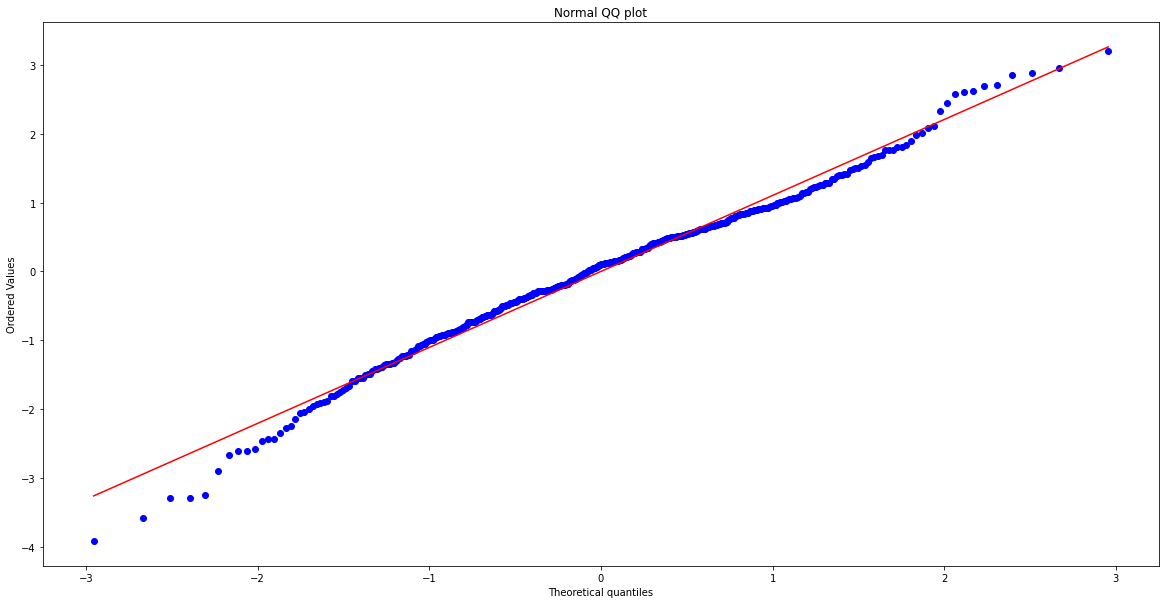

In [38]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

C:\Users\jahon\AppData\Local\Temp\ipykernel_10588\1081090613.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




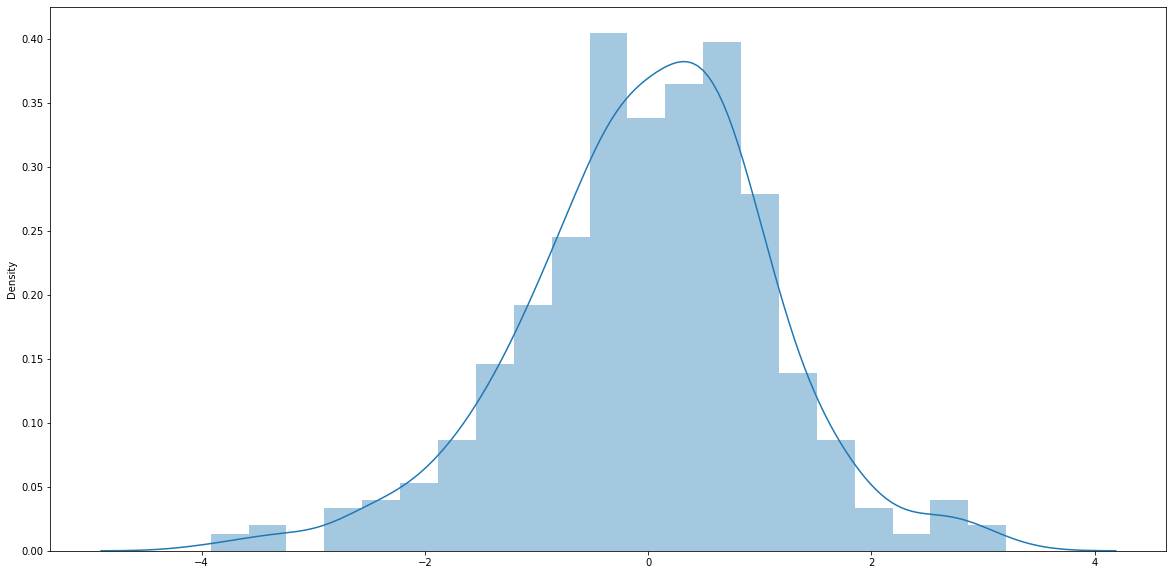

In [39]:
sns.distplot(residuos);

Graficamente, a série aparenta se aproximar de uma distribuição normal. Façamos o teste de Shapiro-Wilk para verificar:

In [40]:
e, p = stats.shapiro(residuos)
print(f'Estátistica de teste: {e:.4f}')
print(f'p-valor: {p:.4e}')

Estátistica de teste: 0.9878
p-valor: 9.1564e-04


Isso indica que a distribuição dos resíduos **não é normal**

#### Autocorrelação

Analisemos a autocorrelação dos resíduos usando ACF e PACF:

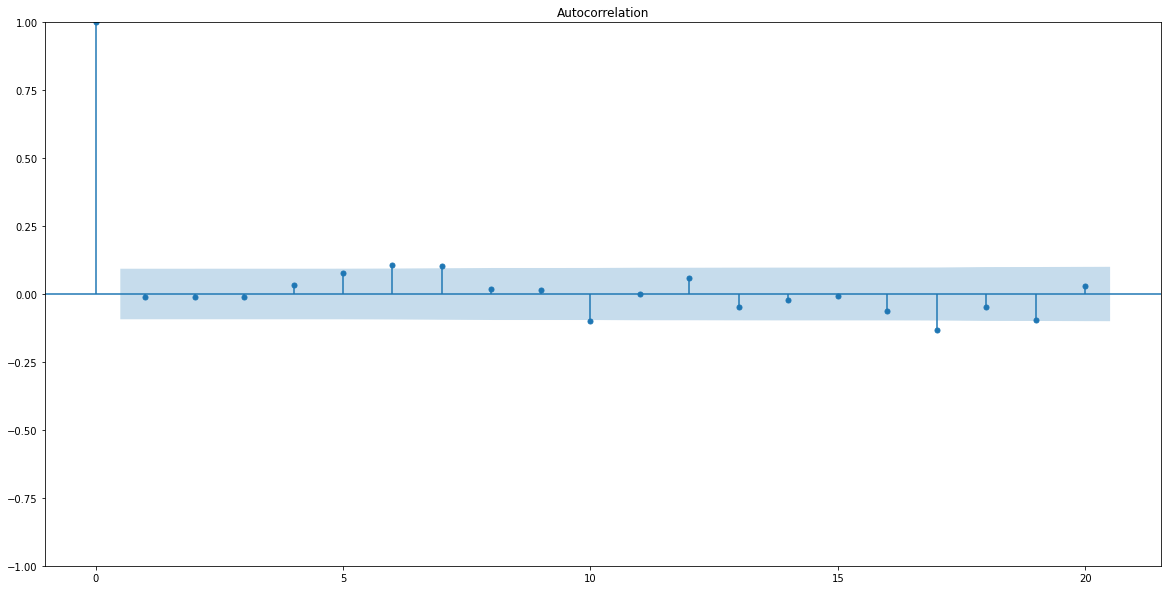

In [41]:
plot_acf(residuos, lags=20)
plt.show()

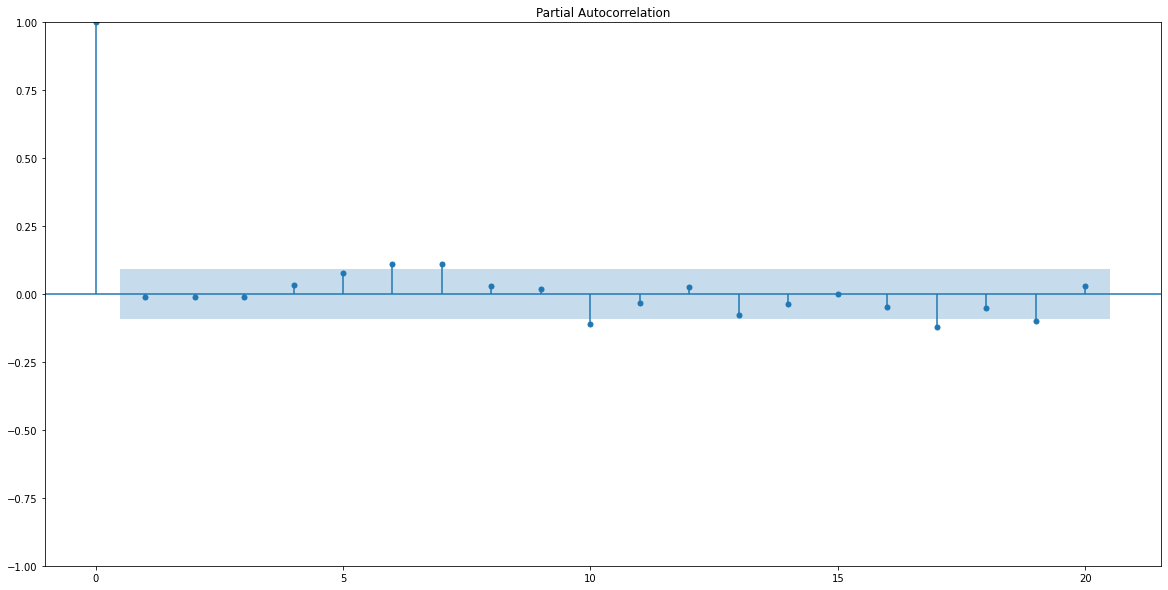

In [42]:
plot_pacf(residuos, lags=20)
plt.show()

Como todos os pontos de ambos os gráficos estão muito próximos do intervalo de confiança, concluímos que os resídios **não possuem autocorrelação**

In [43]:
fig = go.Figure()
_ = serie_n-residuos
fig.add_trace(go.Scatter(x=serie_n.index, y=serie_n.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=serie_n.index, y=_,
                    mode='lines',
                    name='Resíduos'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

### Previsão

In [49]:
resultado.fittedvalues
previsao = resultado.predict(start=444, end=455)
print(previsao)

2022-01-31    6.119308
2022-02-28    5.777399
2022-03-31    5.180045
2022-04-30    4.591335
2022-05-31    4.147924
2022-06-30    3.892134
2022-07-31    3.679600
2022-08-31    3.960849
2022-09-30    4.398404
2022-10-31    4.910139
2022-11-30    5.319964
2022-12-31    5.566835
Freq: M, Name: predicted_mean, dtype: float64


In [50]:
resultado.fittedvalues
previsao = resultado.predict(start=444, end=455)
print(previsao)

fig = go.Figure()
fig.add_trace(go.Scatter(x=serie_n.index, y=serie_n.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=serie_n.index, y=_,
                    mode='lines',
                    name='Resíduos'))
fig.add_trace(go.Scatter(x=previsao.index, y=previsao,
                    mode='lines',
                    name='Previsão AR'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

2022-01-31    6.119308
2022-02-28    5.777399
2022-03-31    5.180045
2022-04-30    4.591335
2022-05-31    4.147924
2022-06-30    3.892134
2022-07-31    3.679600
2022-08-31    3.960849
2022-09-30    4.398404
2022-10-31    4.910139
2022-11-30    5.319964
2022-12-31    5.566835
Freq: M, Name: predicted_mean, dtype: float64


O plot acima leva em consideração os dados transformados (raiz cúbica). Vamos plotar e guardar a previsão em seus valores originais:

In [51]:
prev_escala = pd.DataFrame(previsao**3)
prev_escala.columns = ['Modelo_AR']
prev_escala

,Modelo_AR
2022-01-31,229.143230
2022-02-28,192.839980
2022-03-31,138.995430
2022-04-30,96.786951
2022-05-31,71.366175
2022-06-30,58.960800
2022-07-31,49.819772
2022-08-31,62.139068
2022-09-30,85.091350
2022-10-31,118.380798


Agora, o plot com os dados corrigidos:

In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=serie.index, y=serie.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=prev_escala.index, y=prev_escala['Modelo_AR'],
                    mode='lines',
                    name='Previsão'))

**Problemas do modelo:**
* resíduos não seguem uma distribuição normal

## **Modelo MA**

Modelo ARIMA: (p,d,q)

Modelo MA: (0,0,q)

O modelo de Média Móvel (MA) é uma abordagem importante na análise e previsão de séries temporais. Diferentemente do modelo AR (Auto-Regressivo), o modelo MA baseia-se na premissa de que **o valor atual de uma série temporal é influenciado por ruídos aleatórios ou erros residuais de previsões passadas.** Em um modelo MA, a previsão é feita calculando-se uma média ponderada desses erros residuais anteriores, onde a ordem do modelo, representada como MA(q), determina quantos períodos anteriores são considerados.

In [53]:
for q in range(1, 11):
    modelo_ma = ARIMA(serie_n, order = (0,0,q))
    teste = modelo_ma.fit()
    print(f'ARIMA(0,0,{q}) - AIC: {teste.aic:.4f}')

ARIMA(0,0,1) - AIC: 1576.9559
ARIMA(0,0,2) - AIC: 1530.4653
ARIMA(0,0,3) - AIC: 1526.1620
ARIMA(0,0,4) - AIC: 1521.8347
ARIMA(0,0,5) - AIC: 1513.9659
ARIMA(0,0,6) - AIC: 1484.8873
ARIMA(0,0,7) - AIC: 1452.8131
ARIMA(0,0,8) - AIC: 1447.9581
ARIMA(0,0,9) - AIC: 1449.8165
ARIMA(0,0,10) - AIC: 1451.5367


O menor valor de AIC foi obtido com q = 8

In [54]:
modelo_ma = ARIMA(serie_n, order = (0,0,8))

In [55]:
resultado_ma = modelo_ma.fit()
print(resultado_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:                 ARIMA(0, 0, 8)   Log Likelihood                -713.979
Date:                Tue, 19 Sep 2023   AIC                           1447.958
Time:                        22:38:21   BIC                           1488.916
Sample:                    01-31-1985   HQIC                          1464.110
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7832      0.027    176.787      0.000       4.730       4.836
ma.L1          0.3101      0.050      6.252      0.000       0.213       0.407
ma.L2          0.2305      0.050      4.637      0.0

### Análise dos resíduos

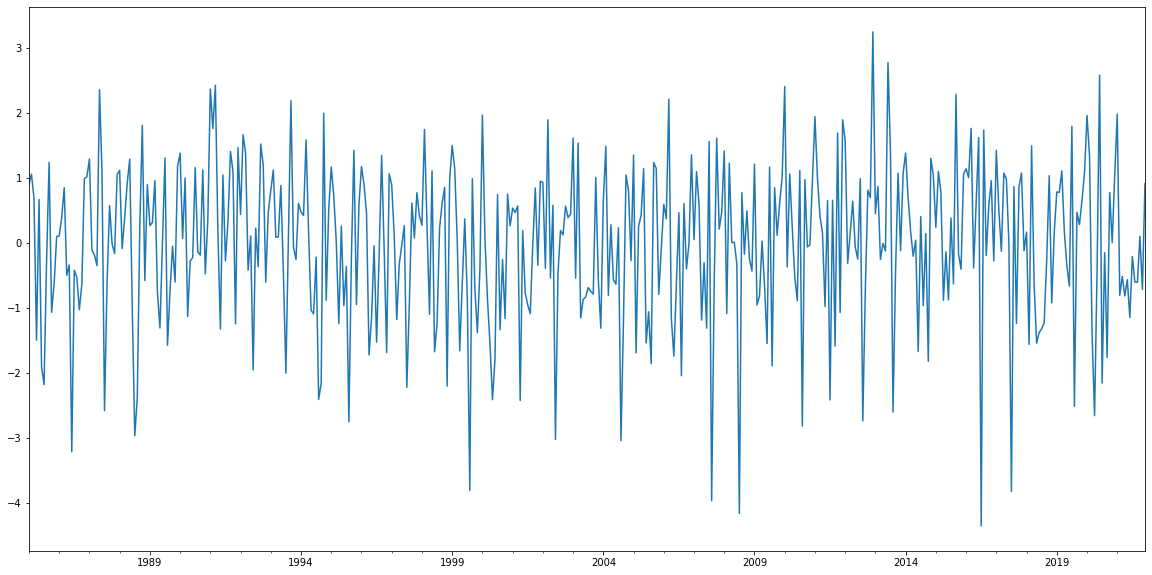

In [56]:
residuos_ma = resultado_ma.resid
residuos_ma.plot()
plt.show()

Os resíduos aparentam ter uma média em torno de zero, com pouca tendência.

#### Normalidade

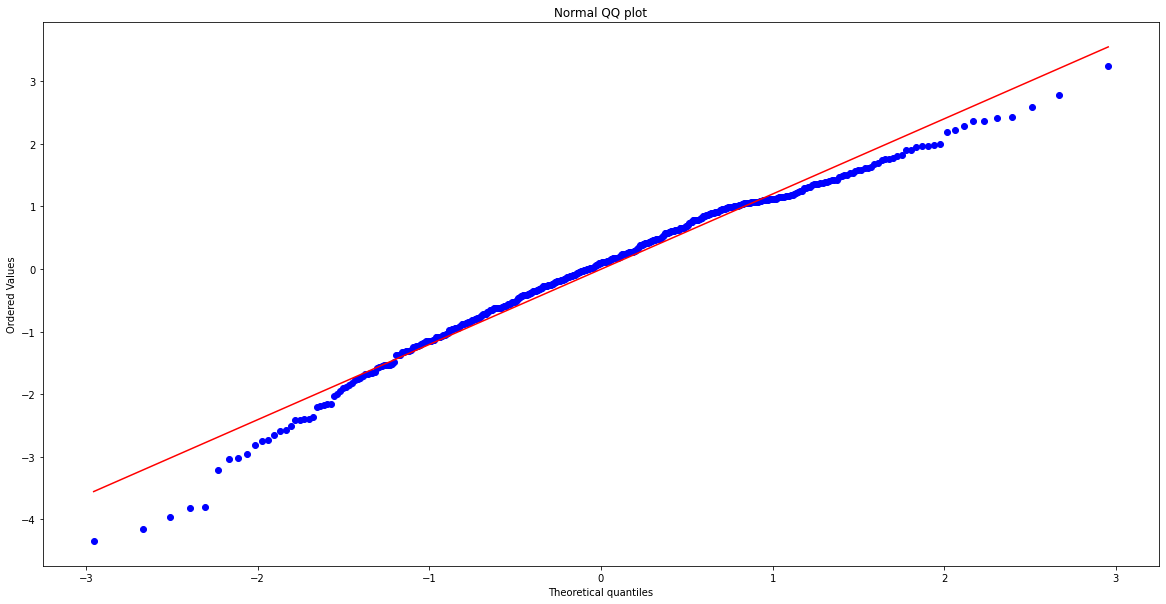

In [57]:
stats.probplot(residuos_ma, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

C:\Users\jahon\AppData\Local\Temp\ipykernel_10588\656102450.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




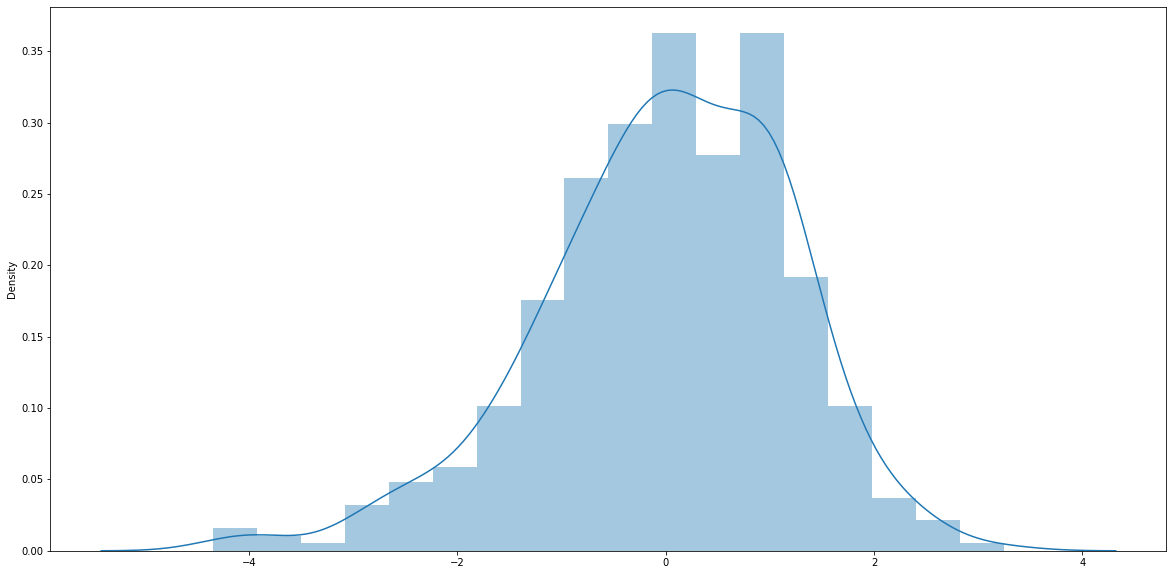

In [58]:
sns.distplot(residuos_ma);

In [59]:
e, p = stats.shapiro(residuos_ma)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9795942306518555
p-valor: 6.798713911848608e-06


Os resíduos **não seguem uma distribuição normal**

#### Autocorrelação

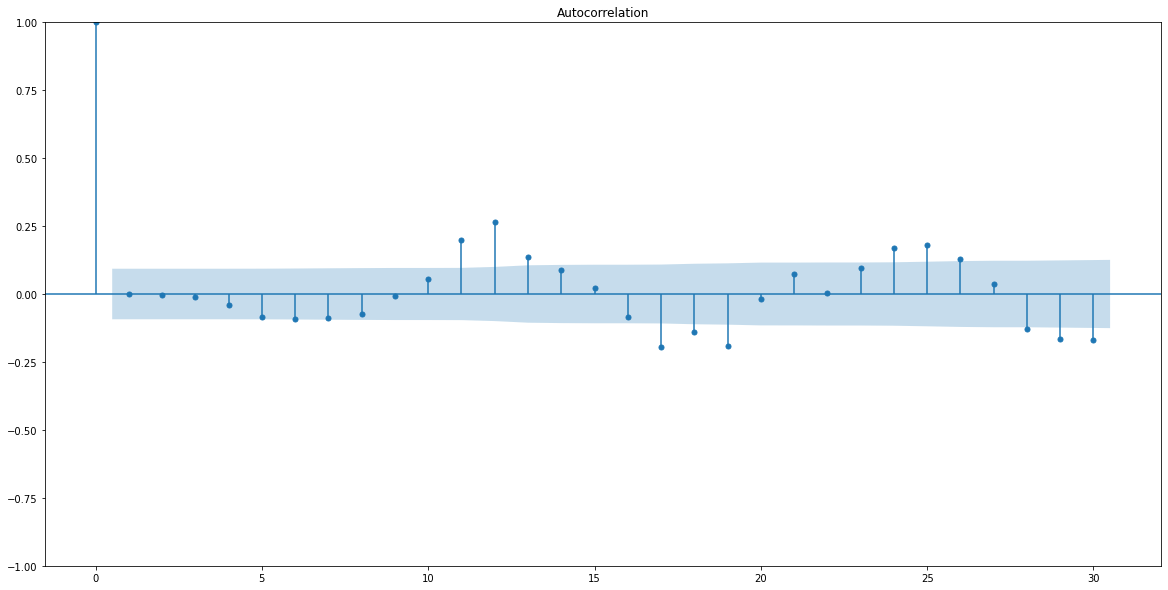

In [60]:
plot_acf(residuos_ma, lags=30)
plt.show()

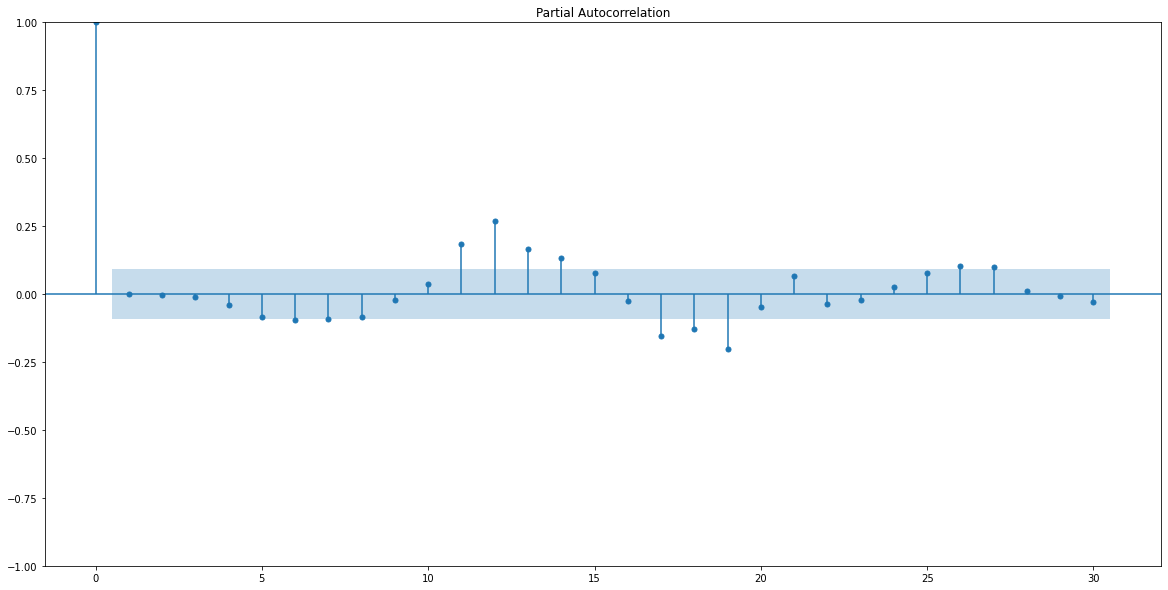

In [61]:
plot_pacf(residuos_ma, lags=30)
plt.show()

Verificando os gráficos do ACF e do PACF, notamos que alguns valores estão fora do intervalo de confiança, apontando para a **existência de autocorrelação nos resíduos**, mesmo que fraca

In [62]:
fig = go.Figure()
_ = serie_n-residuos_ma
fig.add_trace(go.Scatter(x=serie_n.index, y=serie_n.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=serie_n.index, y=_,
                    mode='lines',
                    name='Resíduos'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

### Previsão

In [63]:
resultado_ma.fittedvalues
previsao_ma = resultado_ma.predict(start=444, end=455)

fig = go.Figure()
fig.add_trace(go.Scatter(x=serie_n.index, y=serie_n.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=serie_n.index, y=_,
                    mode='lines',
                    name='Resíduos MA'))
fig.add_trace(go.Scatter(x=previsao_ma.index, y=previsao_ma,
                    mode='lines',
                    name='Previsão MA'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

In [64]:
prev_escala['Modelo_MA'] = previsao_ma**3
prev_escala.head()

,Modelo_AR,Modelo_MA
2022-01-31,229.143230,176.534983
2022-02-28,192.839980,169.292580
2022-03-31,138.995430,143.365600
2022-04-30,96.786951,131.155965
2022-05-31,71.366175,113.790353


In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=serie.index, y=serie.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=prev_escala.index, y=prev_escala['Modelo_MA'],
                    mode='lines',
                    name='Previsão'))

**Problemas do modelo:**
* resíduos não seguem uma distribuição normal
* autocorrelação dos resíduos

## **Modelo ARMA**

Modelo ARIMA: (p,d,q)

Modelo ARMA: (p,0,q)


O modelo ARMA combina um componente autoregressivo (AR), que tenta explicar **a influência dos valores passados na série atual** com um componente de média móvel (MA), **que tenta capturar os erros das previsões passadas.**


In [66]:
modelo_arma = ARIMA(serie_n, order = (7,0,1))
resultado_arma = modelo_arma.fit()
print(resultado_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:                 ARIMA(7, 0, 1)   Log Likelihood                -673.888
Date:                Tue, 19 Sep 2023   AIC                           1367.775
Time:                        22:44:11   BIC                           1408.733
Sample:                    01-31-1985   HQIC                          1383.927
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7767      0.034    139.432      0.000       4.710       4.844
ar.L1          0.3304      0.213      1.553      0.120      -0.087       0.747
ar.L2          0.0428      0.068      0.629      0.5

### Análise dos resíduos

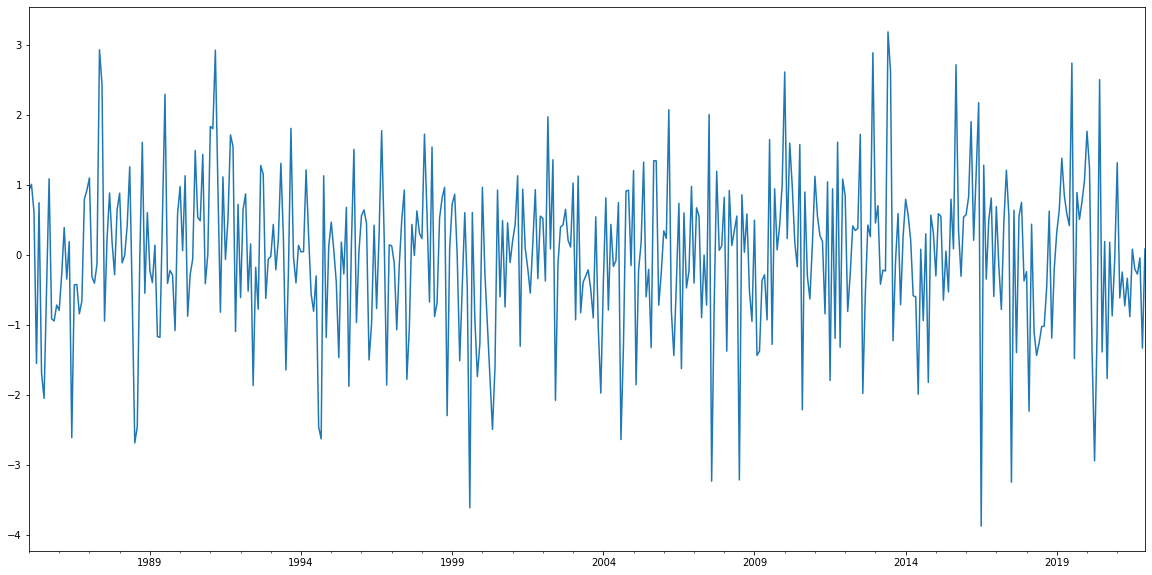

In [67]:
residuos_arma = resultado_arma.resid
residuos_arma.plot()
plt.show()

Os resíduos aparentam ter uma média em torno de zero, com pouca tendência.

#### Normalidade

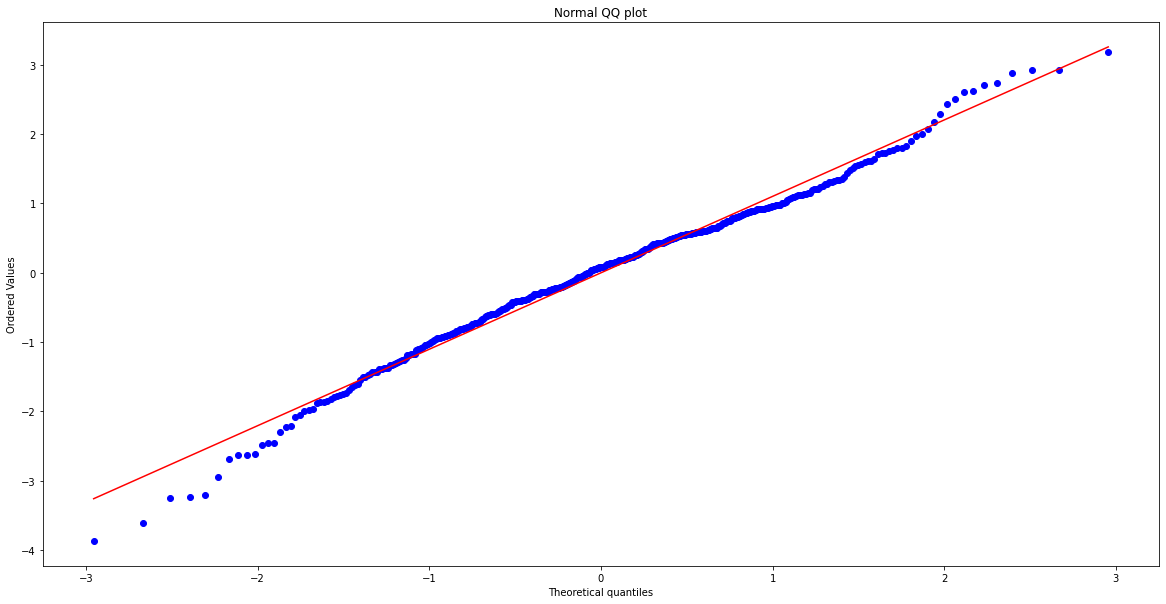

In [68]:
stats.probplot(residuos_arma, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

C:\Users\jahon\AppData\Local\Temp\ipykernel_10588\3134224917.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




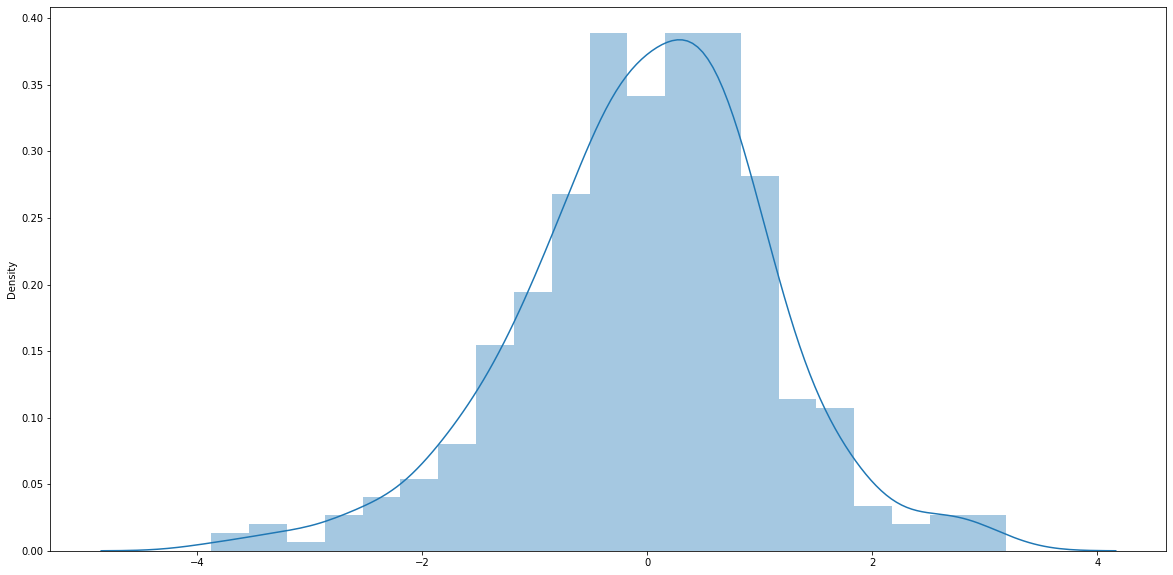

In [69]:
sns.distplot(residuos_arma);

In [70]:
e, p = stats.shapiro(residuos_arma)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9880849719047546
p-valor: 0.001092335325665772


O valor está próximo do limite do teste de hipótese e o gráfico se comporta de maneira similar ao de uma distribuição normal, mas os resíduos **não seguem uma distribuição normal**.

#### Autocorrelação

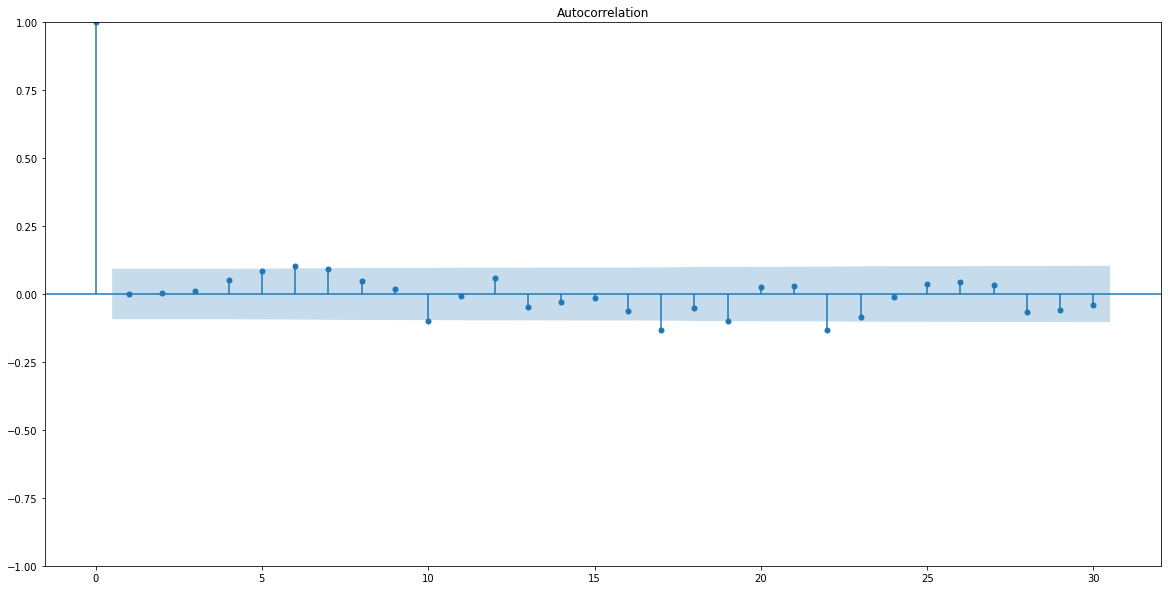

In [71]:
plot_acf(residuos_arma, lags=30)
plt.show()

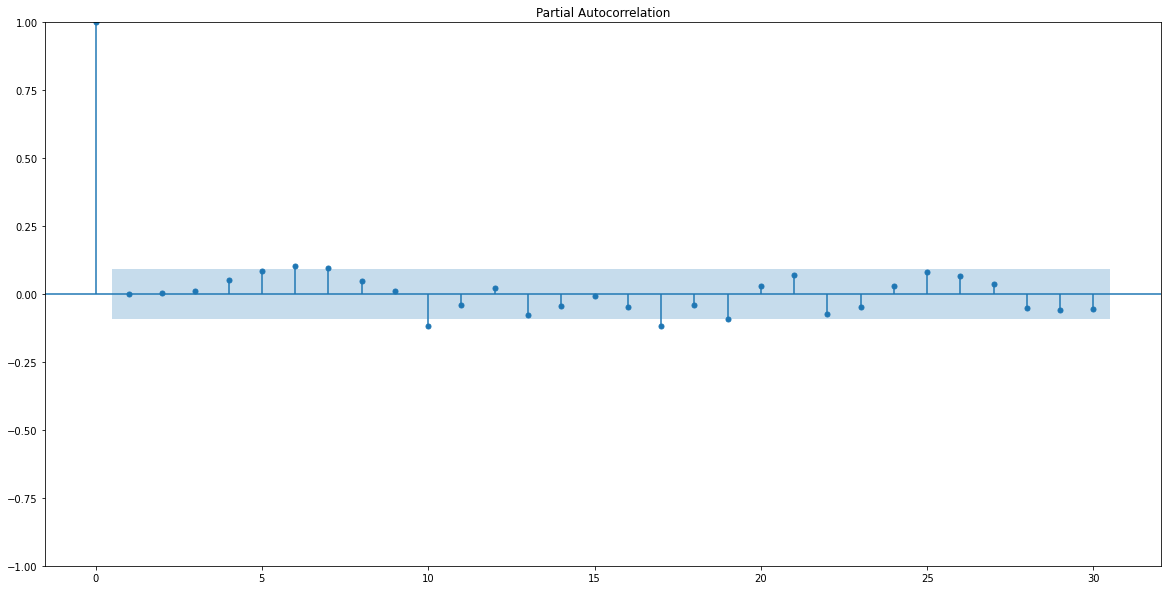

In [72]:
plot_pacf(residuos_arma, lags=30)
plt.show()

Verificando os gráficos do ACF e do PACF, notamos que alguns valores estão fora do intervalo de confiança, apontando para a **existência de autocorrelação nos resíduos**, mesmo que fraca

In [73]:
fig = go.Figure()
_ = serie_n-residuos_arma

fig.add_trace(go.Scatter(x=serie_n.index, y=serie_n.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=serie_n.index, y=_,
                    mode='lines',
                    name='Resíduos'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

### Previsão

In [74]:
resultado_arma.fittedvalues
previsao_arma = resultado_arma.predict(start=444, end=455)

In [75]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=serie_n.index, y=serie_n.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=serie_n.index, y=_,
                    mode='lines',
                    name='Resíduos'))
fig.add_trace(go.Scatter(x=previsao_arma.index, y=previsao_arma,
                    mode='lines',
                    name='Previsão ARMA'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

In [76]:
prev_escala['Modelo_ARMA'] = previsao_arma**3
prev_escala.head()

,Modelo_AR,Modelo_MA,Modelo_ARMA
2022-01-31,229.143230,176.534983,233.243600
2022-02-28,192.839980,169.292580,199.618621
2022-03-31,138.995430,143.365600,141.961537
2022-04-30,96.786951,131.155965,98.789639
2022-05-31,71.366175,113.790353,71.264605


In [77]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=serie.index, y=serie.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=prev_escala.index, y=prev_escala['Modelo_ARMA'],
                    mode='lines',
                    name='Previsão'))

**Problemas do modelo:**
* resíduos não seguem uma distribuição normal
* autocorrelação dos resíduos

## **Modelo ARIMA**

Modelo ARIMA: (p,d,q)

O modelo preditivo ARIMA é uma extensão do modelo ARMA, amplamente utilizado para modelar e prever séries temporais. O ARIMA é especialmente **útil quando a série temporal apresenta tendências temporais e/ou sazonalidades que não podem ser adequadamente capturadas por um modelo ARMA simples.**

O modelo possui três componentes: **o componente autorregressivo (AR), o componente de média móvel (MA) e o componente de integração (I).**

In [78]:
modelo_arima = ARIMA(serie_n, order = (7,1,1))
resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -676.991
Date:                Tue, 19 Sep 2023   AIC                           1371.982
Time:                        22:47:27   BIC                           1408.824
Sample:                    01-31-1985   HQIC                          1386.512
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1575      0.045      3.523      0.000       0.070       0.245
ar.L2          0.0844      0.050      1.675      0.094      -0.014       0.183
ar.L3         -0.0969      0.054     -1.811      0.0

### Análise dos resíduos

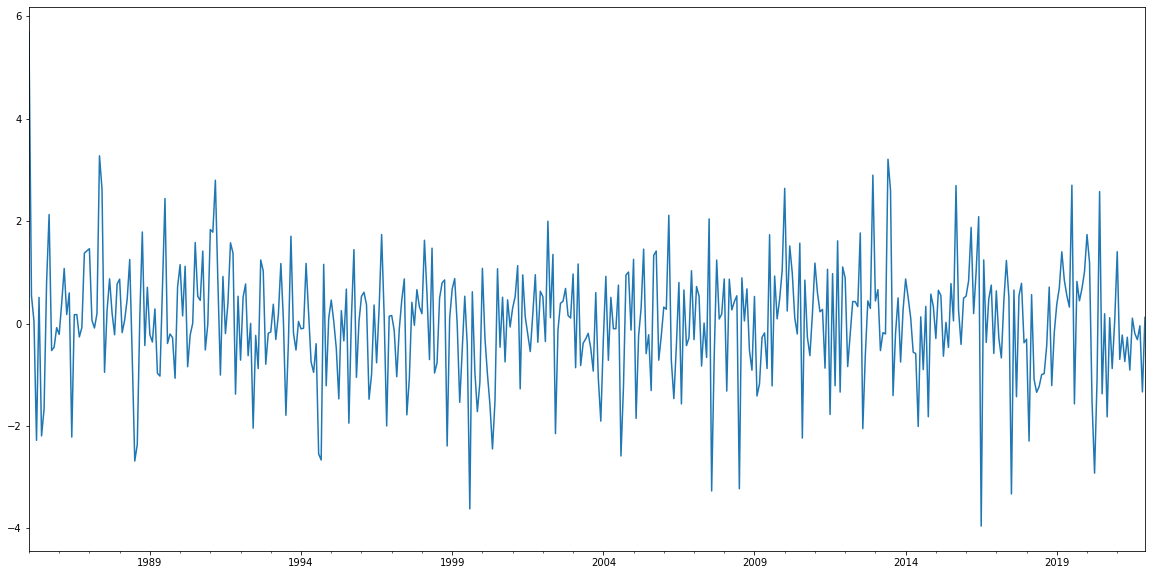

In [79]:
residuos_arima = resultado_arima.resid
residuos_arima.plot()
plt.show;

Os resíduos aparentam ter uma média em torno de zero, com pouca tendência.

#### Normalidade

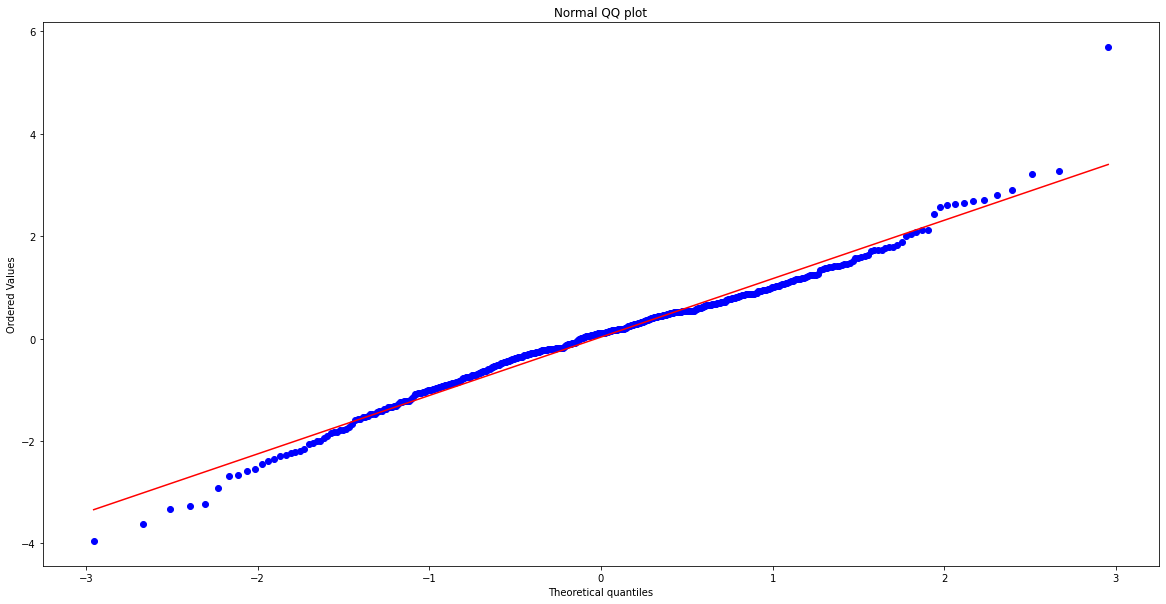

In [80]:
stats.probplot(residuos_arima, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

C:\Users\jahon\AppData\Local\Temp\ipykernel_10588\2354701122.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




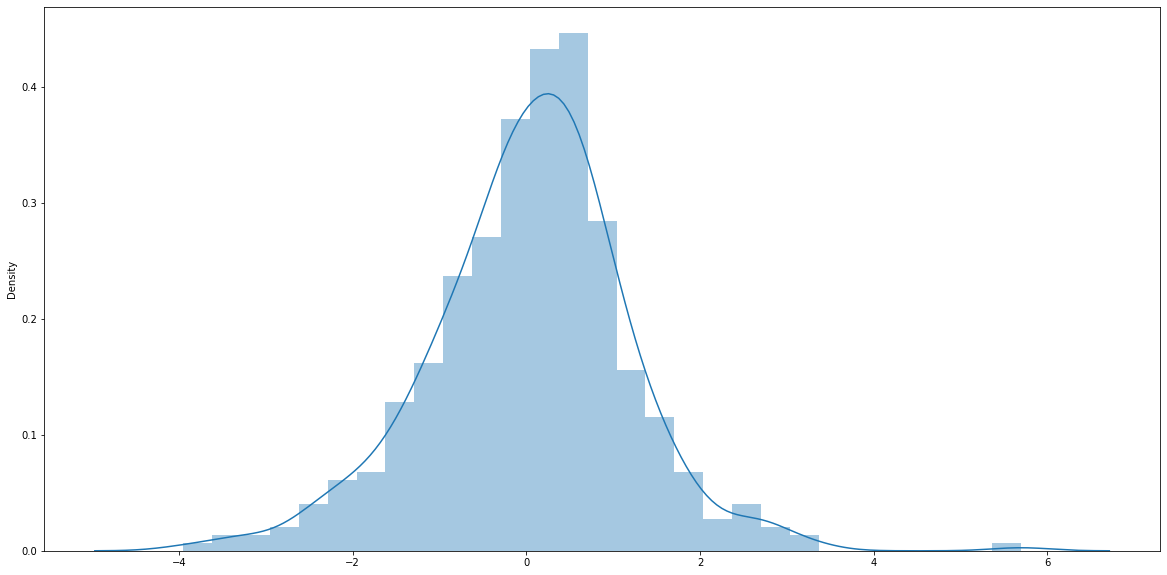

In [81]:
sns.distplot(residuos_arima);

Graficamente, os resíduos se aproximam de uma gaussiana. Façamos o teste de hipóteses:

In [82]:
e, p = stats.shapiro(residuos_arima)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9799239039421082
p-valor: 8.113991498248652e-06


Os resíduos **não seguem uma distribuição normal**

#### Autocorrelação

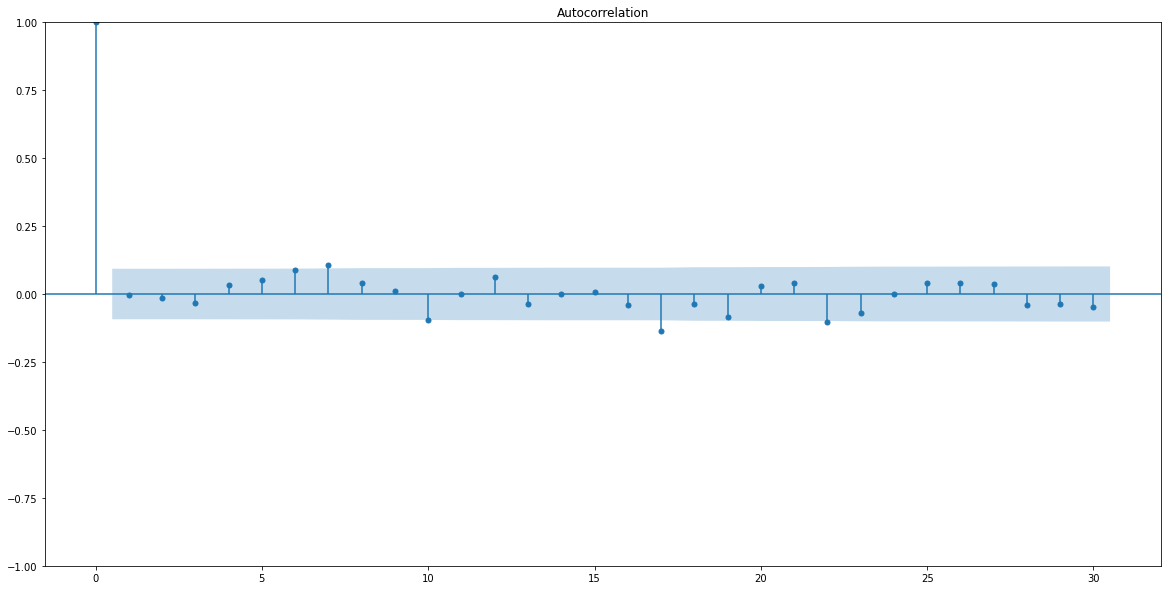

In [83]:
plot_acf(residuos_arima, lags=30)
plt.show()

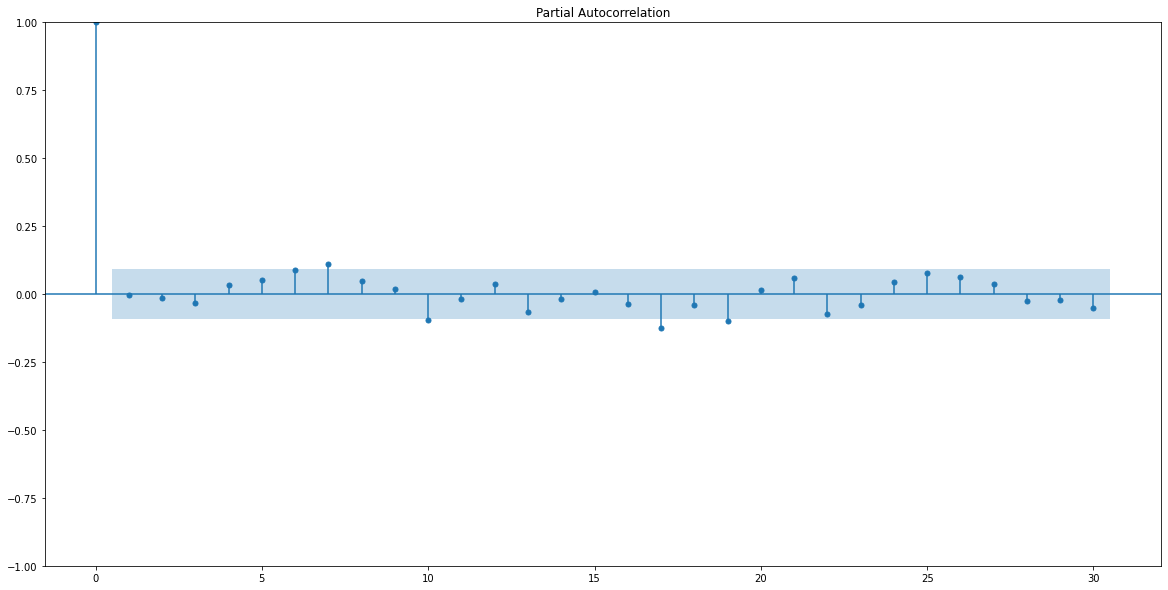

In [84]:
plot_pacf(residuos_arima, lags=30)
plt.show()

Os gráficos apontam que os resíduos possuem uma **autocorrelação muito fraca**, com poucos valores levemente fora do intervalo de confiança.

In [85]:
fig = go.Figure()
_ = serie_n-residuos_arima
fig.add_trace(go.Scatter(x=serie_n.index, y=serie_n.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=serie_n.index, y=_,
                    mode='lines',
                    name='Resíduos ARIMA'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

### Previsão

In [86]:
resultado_arima.fittedvalues
previsao_arima = resultado_arima.predict(start=444, end=455)

In [87]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=serie_n.index, y=serie_n.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=serie_n.index, y=_,
                    mode='lines',
                    name='Resíduos ARIMA'))
fig.add_trace(go.Scatter(x=previsao_arma.index, y=previsao_arma,
                    mode='lines',
                    name='Previsão ARIMA'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

In [88]:
prev_escala['Modelo_ARIMA'] = previsao_arima**3
prev_escala.head()

,Modelo_AR,Modelo_MA,Modelo_ARMA,Modelo_ARIMA
2022-01-31,229.143230,176.534983,233.243600,228.823710
2022-02-28,192.839980,169.292580,199.618621,192.818069
2022-03-31,138.995430,143.365600,141.961537,139.026751
2022-04-30,96.786951,131.155965,98.789639,96.909510
2022-05-31,71.366175,113.790353,71.264605,71.488111


In [89]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=serie.index, y=serie.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=prev_escala.index, y=prev_escala['Modelo_ARIMA'],
                    mode='lines',
                    name='Previsão'))

**Problemas do modelo:**
* resíduos não seguem uma distribuição normal

## **Modelo AutoARIMA**

Modelo ARIMA: (p,d,q)

Modeo SARIMA: (p,d,q)(P,D,Q)

O modelo AutoARIMA considera os componentes do modelo ARIMA + os componente de sazonalidade do modelo SARIMA, sendo o mais completo dentre os apresentados.
Uma das grandes vantagens do modelo AutoARIMA é, além de considerar a sazonalidade, a automatização da busca pelos melhores parâmetros.


In [90]:
from pmdarima.arima import auto_arima

In [91]:
## Buscando o melhor arranjo de parâmetros para o modelo AutoARIMA

modelo_auto = auto_arima(serie_n, trace=True, stepwise=False, seasonal=True,
                         max_p=10, max_q=10, max_P=4, max_Q=4,
                         start_p=0, start_q=0, start_P=0, start_Q=0, m=12)
                        
## trace: imprime o resultado de cada iteração
## stepwise: realiza a busca de forma mais rápida
## seasonal: considerar ou não a sazonalidade
## m: período da sazonalidade (mensal)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1663.446, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1545.513, Time=0.20 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1516.431, Time=0.43 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1475.716, Time=1.60 sec
 ARIMA(0,0,0)(0,0,4)[12] intercept   : AIC=1454.845, Time=2.32 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1468.176, Time=0.33 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1299.984, Time=5.18 sec
 ARIMA(0,0,0)(1,0,4)[12] intercept   : AIC=inf, Time=10.37 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1422.431, Time=1.00 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.82 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=6.00 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=3.45 sec
 ARIMA(0,0,0)(3,0,1)[12] inte

Os parâmetros escolhidos pelo modelo foram ARIMA(0,0,0)(1,0,3).

In [92]:
print(modelo_auto.aic())

1299.984063954439


In [94]:
resultado_auto = modelo_auto.fit(serie_n)
print(resultado_auto.summary())

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  444
Model:             SARIMAX(1, 0, [1, 2, 3], 12)   Log Likelihood                -643.992
Date:                          Tue, 19 Sep 2023   AIC                           1299.984
Time:                                  22:54:26   BIC                           1324.559
Sample:                              01-31-1985   HQIC                          1309.675
                                   - 12-31-2021                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0311      0.018      1.692      0.091      -0.005       0.067
ar.S.L12       0.9934      0.004    251.653      0.

### Análise dos resíduos

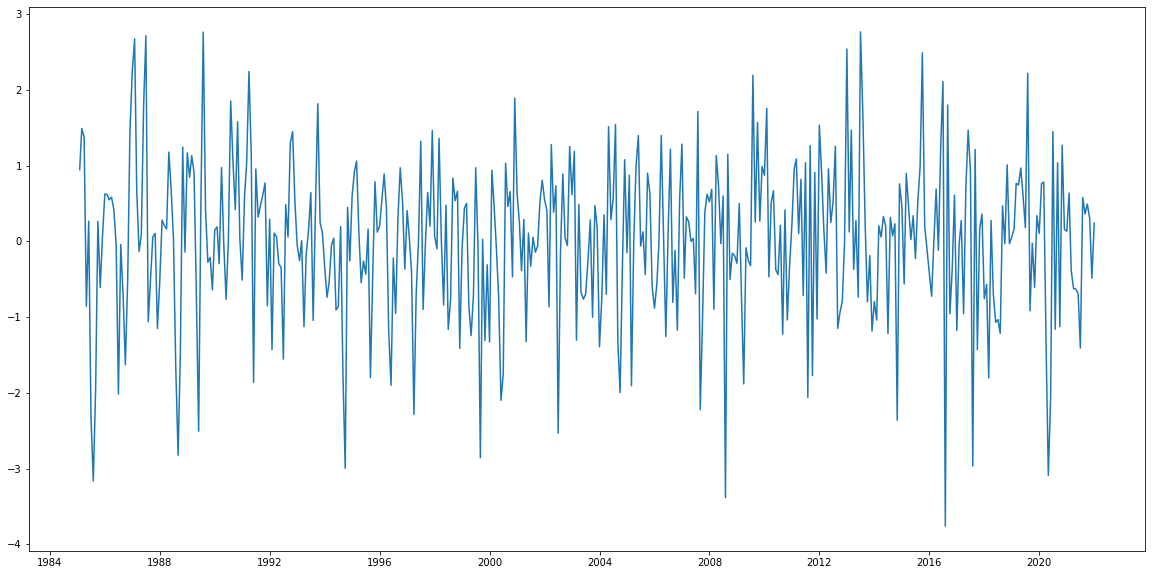

In [95]:
residuos_auto = resultado_auto.resid
plt.plot(residuos_auto())
plt.show();

Resíduos com média em torno de zero, sem tendência.

#### Normalidade

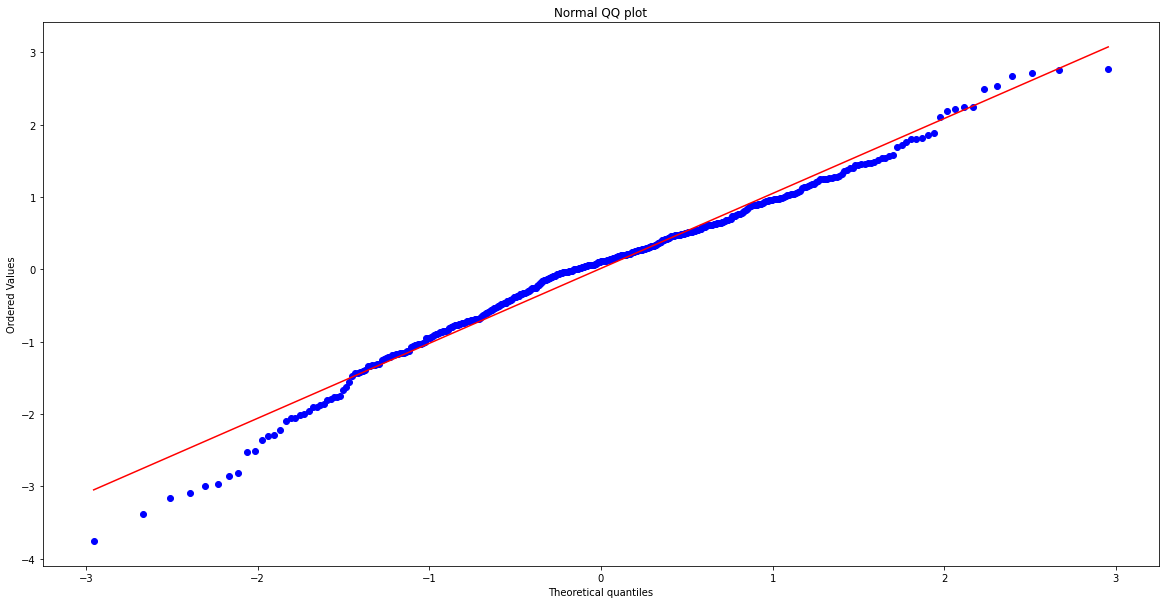

In [96]:
stats.probplot(residuos_auto(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

C:\Users\jahon\AppData\Local\Temp\ipykernel_10588\2051069125.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




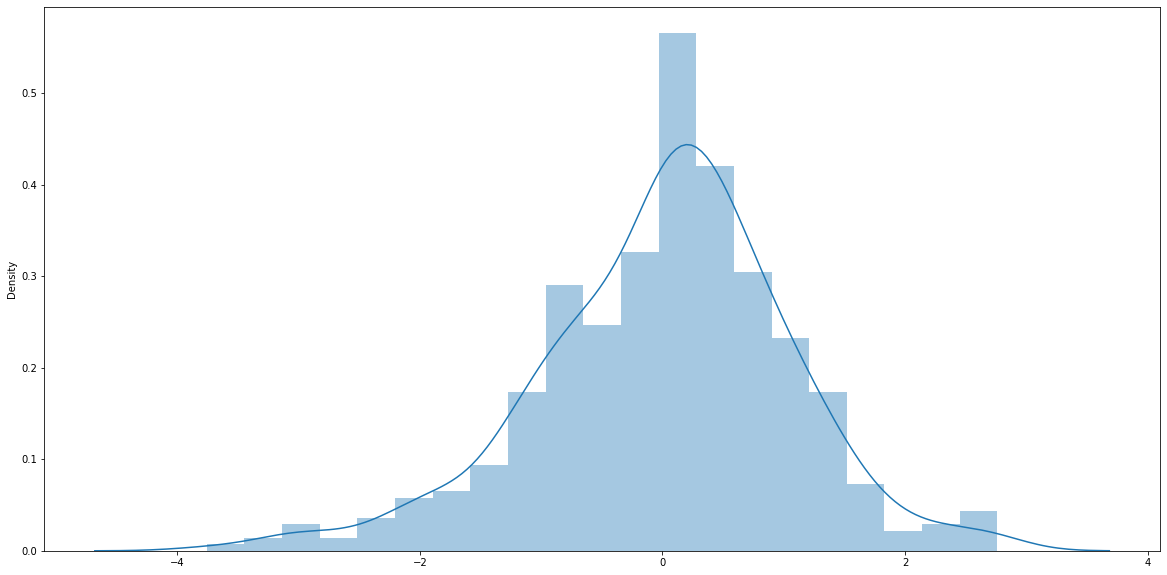

In [97]:
sns.distplot(residuos_auto());

Graficamente, os resíduos se aproximam de uma gaussiana. Façamos o teste de hipóteses:

In [98]:
e, p = stats.shapiro(residuos_auto())
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9824560284614563
p-valor: 3.3179599995492026e-05


Os resíduos **não seguem uma distribuição normal**

#### Autocorrelação

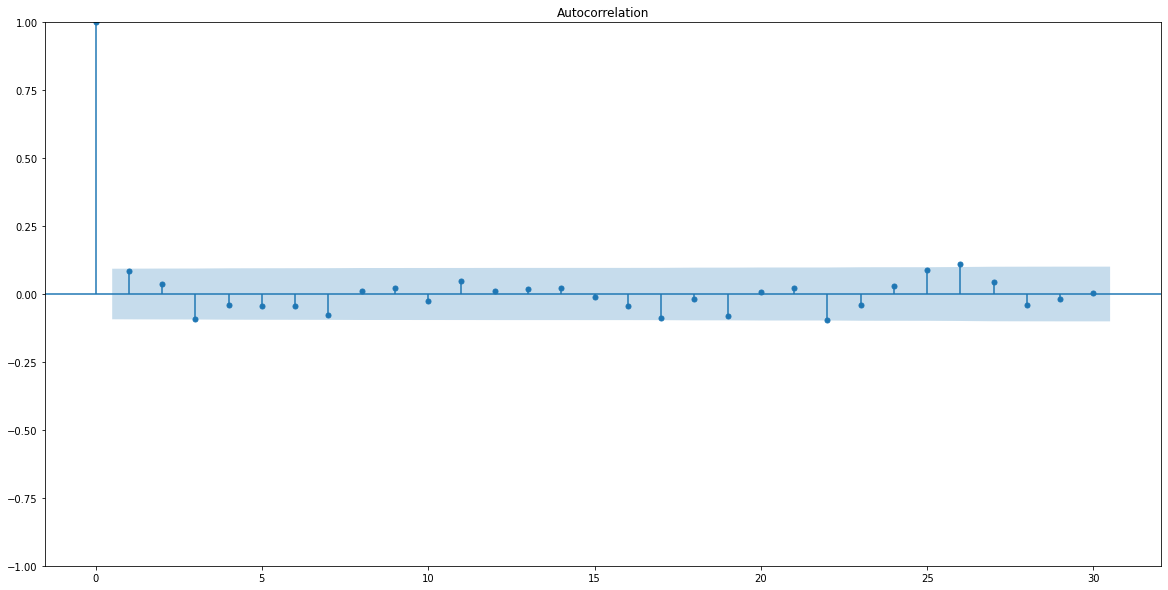

In [99]:
plot_acf(residuos_auto(), lags=30)
plt.show()

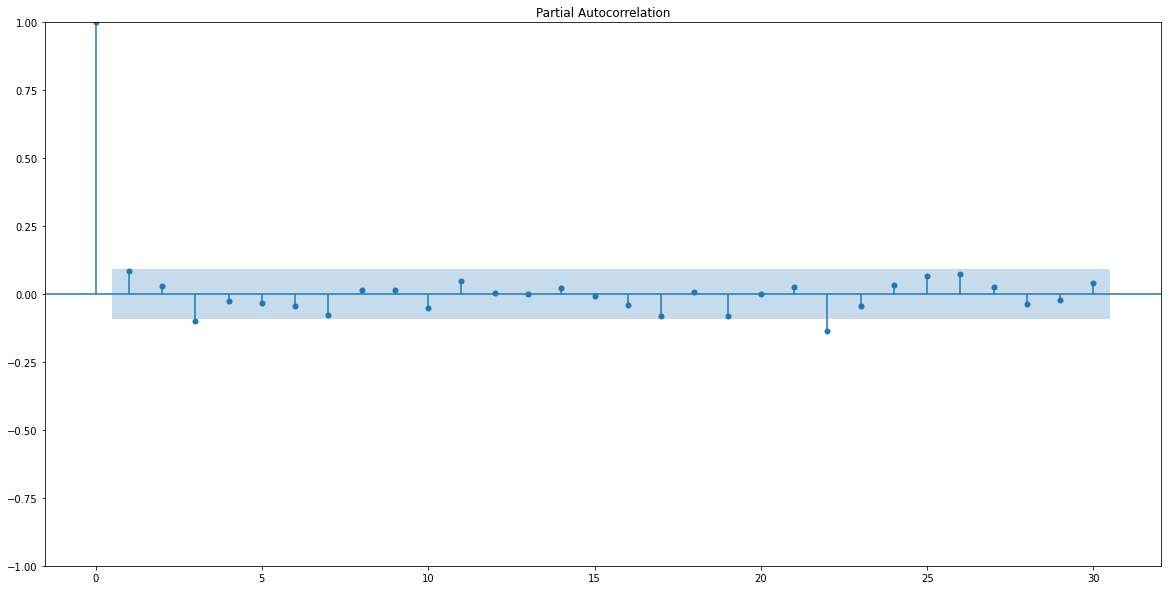

In [100]:
plot_pacf(residuos_auto(), lags=30)
plt.show()

Verificando os gráficos do ACF e do PACF, notamos que os valores estão dentro do intervalo de confiança, mostrando que os resíduos **não possuem correlação.**

In [101]:
fig = go.Figure()
_ = serie_n-residuos_auto()
fig.add_trace(go.Scatter(x=serie_n.index, y=serie_n.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=serie_n.index, y=_,
                    mode='lines',
                    name='Resíduos ARIMA'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

#### Previsão

In [102]:
resultado_auto.fittedvalues
previsao_auto = resultado_auto.predict(n_periods=12)

In [104]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=serie_n.index, y=serie_n.values,
                    mode='lines',
                    name='Série histórica'))
fig.add_trace(go.Scatter(x=serie_n.index, y=_,
                    mode='lines',
                    name='Resíduos AutoARIMA'))
fig.add_trace(go.Scatter(x=previsao_auto.index, y=previsao_auto,
                    mode='lines',
                    name='Previsão AutoARIMA'))
fig.update_layout(title='Série histórica de chuvas mensais em São Paulo',
                    xaxis_title='Anos',
                    yaxis_title='Chuvas (mm)')
fig.show()

In [105]:
prev_escala['Modelo_AutoARIMA'] = previsao_auto**3
prev_escala.head()

,Modelo_AR,Modelo_MA,Modelo_ARMA,Modelo_ARIMA,Modelo_AutoARIMA
2022-01-31,229.143230,176.534983,233.243600,228.823710,277.480243
2022-02-28,192.839980,169.292580,199.618621,192.818069,213.415256
2022-03-31,138.995430,143.365600,141.961537,139.026751,221.070432
2022-04-30,96.786951,131.155965,98.789639,96.909510,122.834725
2022-05-31,71.366175,113.790353,71.264605,71.488111,84.813811


## Comparando as previsões com a realidade

In [107]:
## adicionando os valores de 2022 ao dataframe prev_escala

prev_escala['valores_2022'] = valores_2022
prev_escala.head()

,Modelo_AR,Modelo_MA,Modelo_ARMA,Modelo_ARIMA,Modelo_AutoARIMA,valores_2022
2022-01-31,229.143230,176.534983,233.243600,228.823710,277.480243,418.4
2022-02-28,192.839980,169.292580,199.618621,192.818069,213.415256,136.3
2022-03-31,138.995430,143.365600,141.961537,139.026751,221.070432,233.6
2022-04-30,96.786951,131.155965,98.789639,96.909510,122.834725,40.4
2022-05-31,71.366175,113.790353,71.264605,71.488111,84.813811,67.3


### Verificando os erros dos modelos

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

## AIC por modelo

In [118]:
aic_ar = resultado.aic
aic_ma = resultado_ma.aic
aic_arma = resultado_arma.aic
aic_arima = resultado_arima.aic
aic_auto = resultado_auto.aic()

#### Erro médio absoluto

In [119]:
mae_ar = mean_absolute_error(prev_escala['valores_2022'], prev_escala['Modelo_AR'])
mae_ma = mean_absolute_error(prev_escala['valores_2022'], prev_escala['Modelo_MA'])
mae_arma = mean_absolute_error(prev_escala['valores_2022'], prev_escala['Modelo_ARMA'])
mae_arima = mean_absolute_error(prev_escala['valores_2022'], prev_escala['Modelo_ARIMA'])
mae_auto = mean_absolute_error(prev_escala['valores_2022'], prev_escala['Modelo_AutoARIMA'])

#### Erro quadrático absoluto

In [120]:
mse_ar = mean_squared_error(prev_escala['valores_2022'], prev_escala['Modelo_AR'])
mse_ma = mean_squared_error(prev_escala['valores_2022'], prev_escala['Modelo_MA'])
mse_arma = mean_squared_error(prev_escala['valores_2022'], prev_escala['Modelo_ARMA'])
mse_arima = mean_squared_error(prev_escala['valores_2022'], prev_escala['Modelo_ARIMA'])
mse_auto = mean_squared_error(prev_escala['valores_2022'], prev_escala['Modelo_AutoARIMA'])

In [122]:
## criando um dataframe com os resultados

resultados = pd.DataFrame({'Modelo': ['AR', 'MA', 'ARMA', 'ARIMA', 'AutoARIMA'],
                            'AIC': [aic_ar, aic_ma, aic_arma, aic_arima, aic_auto],
                            'MAE': [mae_ar, mae_ma, mae_arma, mae_arima, mae_auto],
                            'MSE': [mse_ar, mse_ma, mse_arma, mse_arima, mse_auto]})

resultados

,Modelo,AIC,MAE,MSE
0,AR,1366.955425,50.348631,4906.293800
1,MA,1447.958141,76.919355,9174.777958
2,ARMA,1367.775243,50.318778,4824.966891
3,ARIMA,1371.981628,50.449585,4922.205119
4,AutoARIMA,1299.984064,43.128546,3438.563558


Com isso, concluímos que **o modelo AutoARIMA foi o melhor em prever os dados de chuva em 2022**, com os menores valores de erro (médio absoluto e médio quadrático) e de AIC.